This is pilot data collected from HCPS102, 10 trials for control 1 and 14 trials for fusions and 4 trials for control 2.

Remove the first 5 trials of fusion_emg75 due to incorrect emg calibration.

Remove the first 2 trials for each conditions.

Order: EMG, slider, fusion25, fusion75, fusion50, slider, EMG

#EMG calibration
7.520686742198369856e+00 6.410924999999998875e+01
1.230458656330749356e+01 1.926041666666666785e+01



# Import & manage data (all trials), pilot data

 

In [141]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal, fft
import math as math
import os
from matplotlib.patches import Polygon
import copy

In [142]:
# #import all data from git
# path0 = 'C:/Users/hachou/Documents/GitHub/sensorfusion/data/HCPS_101/HCPS101_slider_ctl'
# path1 = 'C:/Users/hachou/Documents/GitHub/sensorfusion/data/HCPS_101/HCPS101_emg_ctl'
# path2 = 'C:/Users/hachou/Documents/GitHub/sensorfusion/data/HCPS_101/HCPS101_fusion_emg50'
# path3 = 'C:/Users/hachou/Documents/GitHub/sensorfusion/data/HCPS_101/HCPS101_fusion_emg25'
# path4 = 'C:/Users/hachou/Documents/GitHub/sensorfusion/data/HCPS_101/HCPS101_fusion_emg75'
# path5 = 'C:/Users/hachou/Documents/GitHub/sensorfusion/data/HCPS_101/HCPS101_slider_ctl2'
# path6 = 'C:/Users/hachou/Documents/GitHub/sensorfusion/data/HCPS_101/HCPS101_emg_ctl2'

# # function that filters npz files
# def fun(f):
#     if f.endswith('.npz') and not f.endswith('rst0.npz') and not f.endswith('rst1.npz') and not f.endswith('rst2.npz') and not f.endswith('a10.npz') and not f.endswith('a0.npz') and not f.endswith('a1.npz'):
#         return True
#     else:
#         return False

# files_0 = os.listdir(path0) 
# files_0 = list(filter(fun, files_0))
# files_1 = os.listdir(path1) 
# files_1 = list(filter(fun, files_1))
# files_2 = os.listdir(path2)
# files_2 = list(filter(fun, files_2))
# files_3 = os.listdir(path3)
# files_3 = list(filter(fun, files_3))
# files_4 = os.listdir(path4)
# files_4 = list(filter(fun, files_4))
# files_5 = os.listdir(path5)
# files_5 = list(filter(fun, files_5))
# files_6 = os.listdir(path6)
# files_6 = list(filter(fun, files_6))

In [143]:
#import all data from git
path0 = 'C:/Users/amber/Documents/GitHub/sensorfusion/data/HCPS_102/HCPS102_slider_ctl'
path1 = 'C:/Users/amber/Documents/GitHub/sensorfusion/data/HCPS_102/HCPS102_emg_ctl'
path2 = 'C:/Users/amber/Documents/GitHub/sensorfusion/data/HCPS_102/HCPS102_fusion_emg50'
path3 = 'C:/Users/amber/Documents/GitHub/sensorfusion/data/HCPS_102/HCPS102_fusion_emg25'
path4 = 'C:/Users/amber/Documents/GitHub/sensorfusion/data/HCPS_102/HCPS102_fusion_emg75'
path5 = 'C:/Users/amber/Documents/GitHub/sensorfusion/data/HCPS_102/HCPS102_slider_ctl2'
path6 = 'C:/Users/amber/Documents/GitHub/sensorfusion/data/HCPS_102/HCPS102_emg_ctl2'

# function that filters npz files
def fun(f):
    if f.endswith('.npz') and not f.endswith('rst0.npz') and not f.endswith('rst1.npz') and not f.endswith('rst2.npz'):
        return True
    else:
        return False
def fun2(f):
    if f.endswith('.npz') and not f.endswith('rst0.npz') and not f.endswith('rst1.npz') and not f.endswith('rst2.npz') and not f.endswith('a0.npz') and not f.endswith('a1.npz'):
        return True
    else:
        return False

files_0 = os.listdir(path0) 
files_0 = list(filter(fun2, files_0))
files_1 = os.listdir(path1) 
files_1 = list(filter(fun2, files_1))
files_2 = os.listdir(path2)
files_2 = list(filter(fun2, files_2))
files_3 = os.listdir(path3)
files_3 = list(filter(fun2, files_3))
files_4 = os.listdir(path4)
files_4 = list(filter(fun2, files_4))
files_5 = os.listdir(path5)
files_5 = list(filter(fun, files_5))
files_6 = os.listdir(path6)
files_6 = list(filter(fun, files_6))

In [144]:
def fun4(f):
    if f.endswith('.npz') and not f.endswith('a2.npz') and not f.endswith('a3.npz') and not f.endswith('a4.npz') and not f.endswith('a5.npz'):
        return True
    else:
        return False
files_4 = list(filter(fun4, files_4))

In [145]:
files0 = files_0
files1 = files_1
files2 = files_2
files3 = files_3
files4 = files_4
files5 = files_5
files6 = files_6

In [146]:
# #import all data from git
# path0 = 'C:/Users/hachou/Documents/GitHub/sensorfusion/data/PilotData_120721/pilot2_1207_slider_ctl'
# path1 = 'C:/Users/hachou/Documents/GitHub/sensorfusion/data/PilotData_120721/pilot2_1207_emg_ctl'
# path2 = 'C:/Users/hachou/Documents/GitHub/sensorfusion/data/PilotData_120721/pilot2_1207_emg50'
# path3 = 'C:/Users/hachou/Documents/GitHub/sensorfusion/data/PilotData_120721/pilot2_1207_emg25'
# path4 = 'C:/Users/hachou/Documents/GitHub/sensorfusion/data/PilotData_120721/pilot2_1207_emg75'
# path5 = 'C:/Users/hachou/Documents/GitHub/sensorfusion/data/PilotData_120721/pilot2_1207_slider_ctl2'
# path6 = 'C:/Users/hachou/Documents/GitHub/sensorfusion/data/PilotData_120721/pilot2_1207_emg_ctl2_loop'

# # path0 = 'C:/Users/amber/Documents/GitHub/sensorfusion/data/PilotData_120721/pilot2_1207_slider_ctl'
# # path1 = 'C:/Users/amber/Documents/GitHub/sensorfusion/data/PilotData_120721/pilot2_1207_emg_ctl'
# # path2 = 'C:/Users/amber/Documents/GitHub/sensorfusion/data/PilotData_120721/pilot2_1207_emg50'
# # path3 = 'C:/Users/amber/Documents/GitHub/sensorfusion/data/PilotData_120721/pilot2_1207_emg25'
# # path4 = 'C:/Users/amber/Documents/GitHub/sensorfusion/data/PilotData_120721/pilot2_1207_emg75'
# # path5 = 'C:/Users/amber/Documents/GitHub/sensorfusion/data/PilotData_120721/pilot2_1207_slider_ctl2'
# # path6 = 'C:/Users/amber/Documents/GitHub/sensorfusion/data/PilotData_120721/pilot2_1207_emg_ctl2_loop'

# # function that filters npz files
# def fun(f):
#     if f.endswith('.npz') and not f.endswith('rst0.npz') and not f.endswith('rst1.npz') and not f.endswith('rst2.npz'):
#         return True
#     else:
#         return False

# files_0 = os.listdir(path0) 
# files_0 = list(filter(fun, files_0))
# files_1 = os.listdir(path1) 
# files_1 = list(filter(fun, files_1))
# files_2 = os.listdir(path2)
# files_2 = list(filter(fun, files_2))
# files_3 = os.listdir(path3)
# files_3 = list(filter(fun, files_3))
# files_4 = os.listdir(path4)
# files_4 = list(filter(fun, files_4))
# files_5 = os.listdir(path5)
# files_5 = list(filter(fun, files_5))
# files_6 = os.listdir(path6)
# files_6 = list(filter(fun, files_6))

In [147]:
# #reorder lists in those files to make sure data are in correct order
# order = []
# for i in range(len(files_0)):
#   order.append(int(files_0[i][-5:-4]))
# index = np.argsort(order)
# files0 = [files_0[i] for i in index]

# order = []
# for i in range(len(files_1)):
#   order.append(int(files_1[i][-5:-4]))
# index = np.argsort(order)
# files1 = [files_1[i] for i in index]

# order = []
# for i in range(len(files_2)):
#   order.append(int(files_2[i][-5:-4]))
# index = np.argsort(order)
# files2 = [files_2[i] for i in index]

# order = []
# for i in range(len(files_3)):
#   order.append(int(files_3[i][-5:-4]))
# index = np.argsort(order)
# files3 = [files_3[i] for i in index]

# order = []
# for i in range(len(files_4)):
#   order.append(int(files_4[i][-5:-4]))
# index = np.argsort(order)
# files4 = [files_4[i] for i in index]

# order = []
# for i in range(len(files_5)):
#   order.append(int(files_5[i][-5:-4]))
# index = np.argsort(order)
# files5 = [files_5[i] for i in index]

# order = []
# for i in range(len(files_6)):
#   order.append(int(files_6[i][-5:-4]))
# index = np.argsort(order)
# files6 = [files_6[i] for i in index]

In [148]:
SLIDER = {}; EMG = {}; FUSION50 = {}; FUSION25 = {}; FUSION75 = {}; SLIDER2 = {}; EMG2 = {};
i = 0
for trials in files0:
    #make a dict for each trial in the folder
    trial = dict(np.load(os.path.join(path0, trials), allow_pickle=True))
    #delete "filename"
    del trial['filename']
    #eliminate first 5 seconds of data
    for k in range(len(trial.keys())):
      trial[list(trial.keys())[k]] = trial[list(trial.keys())[k]][301:-1]
    #create a nested dict, including all trials
    SLIDER['trial'+str(i)] = trial
    i+=1

i = 0
for trials in files1:
    trial = dict(np.load(os.path.join(path1, trials), allow_pickle=True))
    del trial['filename']
    for k in range(len(trial.keys())):
      trial[list(trial.keys())[k]] = trial[list(trial.keys())[k]][301:-1]
    EMG['trial'+str(i)] = trial
    i+=1

i = 0
for trials in files2:
    trial = dict(np.load(os.path.join(path2, trials), allow_pickle=True))
    del trial['filename']
    for k in range(len(trial.keys())):
      trial[list(trial.keys())[k]] = trial[list(trial.keys())[k]][301:-1]
    FUSION50['trial'+str(i)] = trial
    i+=1

i = 0
for trials in files3:
    trial = dict(np.load(os.path.join(path3, trials), allow_pickle=True))
    del trial['filename']
    for k in range(len(trial.keys())):
      trial[list(trial.keys())[k]] = trial[list(trial.keys())[k]][301:-1]
    FUSION25['trial'+str(i)] = trial
    i+=1

i = 0
for trials in files4:
    trial = dict(np.load(os.path.join(path4, trials), allow_pickle=True))
    del trial['filename']
    for k in range(len(trial.keys())):
      trial[list(trial.keys())[k]] = trial[list(trial.keys())[k]][301:-1]
    FUSION75['trial'+str(i)] = trial
    i+=1

i = 0
for trials in files5:
    trial = dict(np.load(os.path.join(path5, trials), allow_pickle=True))
    del trial['filename']
    for k in range(len(trial.keys())):
      trial[list(trial.keys())[k]] = trial[list(trial.keys())[k]][301:-1]
    SLIDER2['trial'+str(i)] = trial
    i+=1

i = 0
for trials in files6:
    trial = dict(np.load(os.path.join(path6, trials), allow_pickle=True))
    del trial['filename']
    for k in range(len(trial.keys())):
      trial[list(trial.keys())[k]] = trial[list(trial.keys())[k]][301:-1]
    EMG2['trial'+str(i)] = trial
    i+=1

In [149]:
SLIDER.keys()

dict_keys(['trial0', 'trial1', 'trial2', 'trial3', 'trial4', 'trial5', 'trial6', 'trial7'])

In [150]:
SLIDER['trial0'].keys()

dict_keys(['ref_', 'inp0_', 'out_', 'state_', 'time_', 'inp_', 'dis_', 'inp1_', 'realtime_'])

# Data Analysis

In [151]:
def FFT(data,N):
  return fft.fft(data)/N

def IFFT(data,N):
  return (fft.ifft(data)*N).real

M = lambda s : 1/(s**2 + s)

num_cond = 7 #number of conditions

scaleOutputScreen = 1/4
scaleInput = 0.04616974606700115

#parameters (same for all three conditions)
trialnum0 = len(SLIDER.keys())         #number of data trials, trial0 ~ trial3
trialnum1 = len(EMG.keys())         #number of data trials, trial0 ~ trial3
trialnum2 = len(FUSION50.keys())         #number of data trials, trial0 ~ trial3
trialnum3 = len(FUSION25.keys())         #number of data trials, trial0 ~ trial3
trialnum4 = len(FUSION75.keys())         #number of data trials, trial0 ~ trial3
trialnum5 = len(SLIDER2.keys())         #number of data trials, trial0 ~ trial3
trialnum6 = len(EMG2.keys())         #number of data trials, trial0 ~ trial3

trialnum = [trialnum0,trialnum1,trialnum2,trialnum3,trialnum4,trialnum5,trialnum6]

fs = 60                               #pygame update rate 60 Hz
base_freq = 0.05                      #1/20 Hz
N = len(SLIDER['trial0']['time_'])    #data length
xf_all = fft.fftfreq(N, 1./ fs)       #freq (x-axis) both + and - terms
xf = fft.fftfreq(N, 1./ fs)[:N//2]    #freq (x-axis) positive-frequency terms
M_h = M(1.j*2*np.pi*xf_all)           #M_hat = 1/ ((jw)^2 + (jw))
t = SLIDER['trial0']['time_']         #time
prime = np.asarray([2, 3, 5, 7, 
                    11, 13, 17, 19])  #prime numbers

def Analysis(data,trialnum):

  r = []      #r, reference (time)
  Md = []     #Md, disturbance (time)
  y = []      #y, output (time)
  r_h = []    #r_hat, reference (freq)
  y_h = []    #y_hat, output (freq)
  Md_h = []   #Md_hat, disturbance (freq)
  Wr_h = []   #Wr_hat, M^{-1}r_hat (freq)
  Wr = []     #Wr, M^{-1}r (time)
  u_h = []    #u_hat, input (freq)
  u = []      #u, input (time)
  u0_h = []   #u0_hat, emg input (freq)
  u0 = []     #u0, emg input (time)
  u1_h = []   #u1_hat, slider input (freq)
  u1 = []     #u1, slider input (time)
  d_h = []    #d_hat, disturbance (freq)
  d = []      #d, disturbance (time)

  for i in range(trialnum):
    
    #(1) output 
    r.append( data['trial'+str(i)]['ref_'] )
    d.append( data['trial'+str(i)]['dis_'] )
    y.append( data['trial'+str(i)]['out_'] )
    
    #(2) fft (entire freq term)
    r_h.append( FFT(r[i],N) )
    y_h.append( FFT(y[i],N) )
    d_h.append( FFT(d[i],N) )

    #(3) M^{-1}r_hat = Wr_hat = r_hat / M_hat in freq domain and Wr in time domain
    Wr_h.append( r_h[i] / M_h )
    Wr_h[i][0] = 0 #nan
    Wr.append( IFFT(Wr_h[i],N) )
    
    #(4) input(u): u_hat in freq domain and u in time domain
    u_h.append( FFT(data['trial'+str(i)]['inp_'],N) ) #combined input
    u.append( IFFT(u_h[i],N) )

    u0_h.append( FFT(data['trial'+str(i)]['inp0_'],N) ) #seperated emg input
    u0.append( IFFT(u0_h[i],N) )

    u1_h.append( FFT(data['trial'+str(i)]['inp1_'],N) ) #seperated slider input 
    u1.append( IFFT(u1_h[i],N) )

    #(5) disturbance(d): d_hat = Md_hat/M_hat in freq domain and d in time domain
    Md_h.append( d_h[i] * M_h )
    Md_h[i][0] = 0 #nan
    Md.append( IFFT(Md_h[i],N) )

    #output scaling
    r[i] = r[i]*scaleOutputScreen
    y[i] = y[i]*scaleOutputScreen
    Md[i] = Md[i]*scaleOutputScreen
    r_h[i] = r_h[i]*scaleOutputScreen
    y_h[i] = y_h[i]*scaleOutputScreen
    Md_h[i] = Md_h[i]*scaleOutputScreen

    #input scaling
    d[i] = d[i]*scaleInput
    Wr[i] = Wr[i]*scaleInput
    u[i] = u[i]*scaleInput
    u0[i] = u0[i]*scaleInput
    u1[i] = u1[i]*scaleInput
    d_h[i] = d_h[i]*scaleInput
    Wr_h[i] = Wr_h[i]*scaleInput
    u_h[i] = u_h[i]*scaleInput
    u0_h[i] = u0_h[i]*scaleInput
    u1_h[i] = u1_h[i]*scaleInput    

  #create dict
  time_domain = {'Md':Md,'r':r,'y':y,'d':d,'Wr':Wr,'u':u,'u0':u0,'u1':u1} #time domain
  freq_domain = {'MD':Md_h,'R':r_h,'Y':y_h,'D':d_h,'WR':Wr_h,'U':u_h,'U0':u0_h,'U1':u1_h} #freq domain

  return time_domain, freq_domain

<ipython-input-151-18ff9bf0af02>:7: RuntimeWarning: divide by zero encountered in true_divide
  M = lambda s : 1/(s**2 + s)
<ipython-input-151-18ff9bf0af02>:7: RuntimeWarning: invalid value encountered in true_divide
  M = lambda s : 1/(s**2 + s)


In [152]:
time_slider, freq_slider = Analysis(SLIDER,trialnum[0])
time_emg, freq_emg = Analysis(EMG,trialnum[1])
time_fusion50, freq_fusion50 = Analysis(FUSION50,trialnum[2])
time_fusion25, freq_fusion25 = Analysis(FUSION25,trialnum[3])
time_fusion75, freq_fusion75 = Analysis(FUSION75,trialnum[4])
time_slider2, freq_slider2  = Analysis(SLIDER2,trialnum[5])
time_emg2, freq_emg2 = Analysis(EMG2,trialnum[6])


#create nested dict
TIME = { 'condition0': time_slider, 
         'condition1': time_emg,
         'condition2': time_fusion50,
         'condition3': time_fusion25,
         'condition4': time_fusion75,
         'condition5': time_slider2, 
         'condition6': time_emg2}
FREQ = { 'condition0': freq_slider, 
         'condition1': freq_emg,
         'condition2': freq_fusion50,
         'condition3': freq_fusion25,
         'condition4': freq_fusion75,
         'condition5': freq_slider2, 
         'condition6': freq_emg2}

<ipython-input-151-18ff9bf0af02>:67: RuntimeWarning: invalid value encountered in true_divide
  Wr_h.append( r_h[i] / M_h )
<ipython-input-151-18ff9bf0af02>:82: RuntimeWarning: invalid value encountered in multiply
  Md_h.append( d_h[i] * M_h )


# Time domain and Freq domain Plots

In [153]:
#determine colors and font size|
colors = dict(M='#6600CC',
              F='#000000',
              B='#FFFFFF',
              H='#009900',
              r='#FDB119',
              u='#009900',
              u25='#BBF90F',
              u75='#006400',
              d='#FD6E19',
              #y='#0033FF',  #or 6600CC which is darker and I prefer 
              y='#6600CC',  #or 6600CC which is darker and I prefer 
              N='#0000CC',
              D='#CC0000',
              g='#B1B1B1', #grey
              first5='#B1B1B1',
              last5='#999999')
              # D = dominant = right; N = nondominant = left
yfill = list(matplotlib.colors.to_rgba(colors['y']))
yfill[-1] = 0.3

ufill = list(matplotlib.colors.to_rgba(colors['u']))
ufill[-1] = 0.3

gfill = list(matplotlib.colors.to_rgba(colors['g']))
gfill[-1] = 0.3

rfill = list(matplotlib.colors.to_rgba(colors['r']))
rfill[-1] = 0.3

font = {#'family' : 'normal',
        # 'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

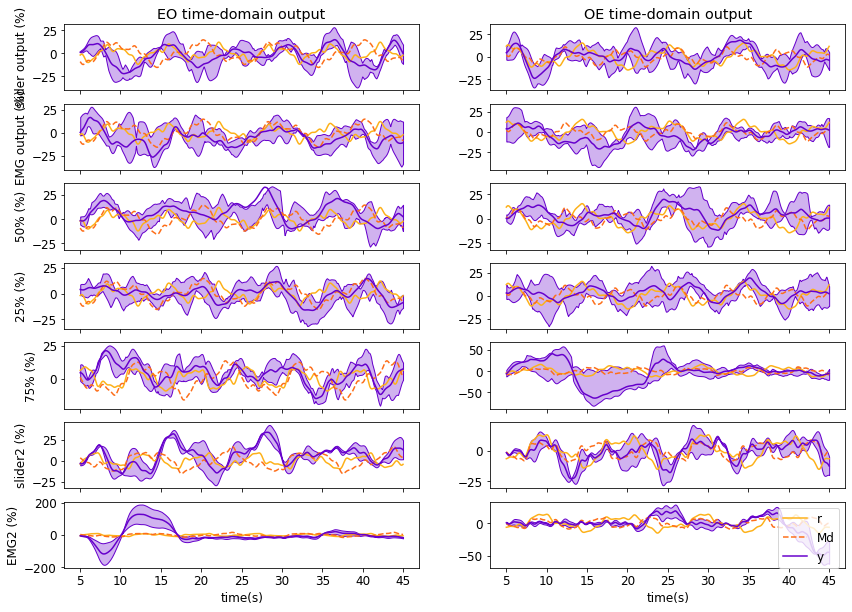

In [154]:
# (1)time-domain output
fig,axs = plt.subplots(num_cond,2,sharex=True,figsize=(14,10))

for k in range(num_cond): #number of conditions

  condition = TIME['condition'+str(k)]

  #Lists of Even (EO) and Odd (OE) trials
  EO = [x for x in range(trialnum[k]) if x % 2 == 0] # EO trials (ref - Even, dis - Odd)
  OE = [x for x in range(trialnum[k]) if x % 2 != 0]  # OE trials (ref - Odd, dis - Even)

  #seperate EO and OE trials
  output_even = [condition['y'][i] for i in EO]
  output_odd = [condition['y'][i] for i in OE]

  #calculate output mean, 75 & 25 percentile
  condition['y_mean'] = [np.mean(output_even, axis=0), np.mean(output_odd, axis=0)]
  condition['y_75'] = [np.percentile(output_even, 75, axis=0), np.percentile(output_odd, 75, axis=0)]
  condition['y_25'] = [np.percentile(output_even, 25, axis=0), np.percentile(output_odd, 25, axis=0)]

  for i in range(2): #even or odd
    # plot time domain output
    axs[k,i].plot(t,condition['r'][i]*100,color=colors['r'],label='r') #reference
    axs[k,i].plot(t,condition['Md'][i]*100,'--',color=colors['d'],label='Md') #disturbance
    axs[k,i].plot(t,condition['y_mean'][i]*100,color=colors['y'],label='y') #output
    axs[k,i].fill_between(t, condition['y_25'][i]*100,condition['y_75'][i]*100,
                          facecolor=yfill,edgecolor=colors['y'])

axs[0,0].title.set_text('EO time-domain output')  
axs[0,1].title.set_text('OE time-domain output')
axs[num_cond-1,0].set_xlabel('time(s)')
axs[num_cond-1,1].set_xlabel('time(s)')
axs[0,0].set_ylabel('slider output (%)')
axs[1,0].set_ylabel('EMG output (%)')
axs[2,0].set_ylabel('50% (%)')
axs[3,0].set_ylabel('25% (%)')
axs[4,0].set_ylabel('75% (%)')
axs[5,0].set_ylabel('slider2 (%)')
axs[6,0].set_ylabel('EMG2 (%)')
plt.legend(loc = 'upper right');
plt.show();

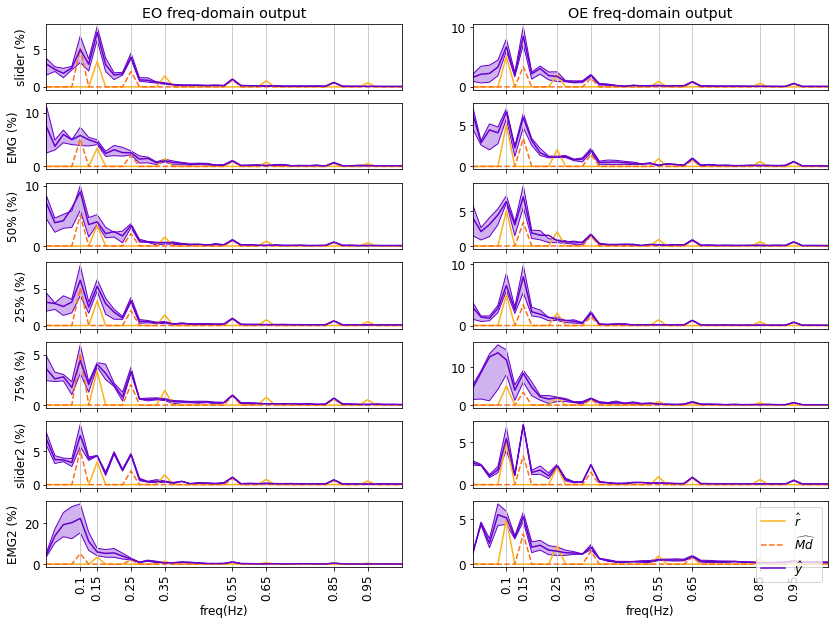

In [155]:
# (2)freq-domain output
fig,axs = plt.subplots(num_cond,2,sharex=True,figsize=(14,10))

for k in range(num_cond): #number of conditions

  condition = FREQ['condition'+str(k)]

  #Lists of Even (EO) and Odd (OE) trials
  EO = [x for x in range(trialnum[k]) if x % 2 == 0] # EO trials (ref - Even, dis - Odd)
  OE = [x for x in range(trialnum[k]) if x % 2 != 0]  # OE trials (ref - Odd, dis - Even)

  #seperate EO and OE trials
  output_even = [np.abs(condition['Y'][i][:N//2]) for i in EO]
  output_odd = [np.abs(condition['Y'][i][:N//2]) for i in OE]

  #calculate output mean, 75 & 25 percentile
  condition['Y_mean'] = [np.mean(output_even, axis=0), np.mean(output_odd, axis=0)]
  condition['Y_75'] = [np.percentile(output_even, 75, axis=0), np.percentile(output_odd, 75, axis=0)]
  condition['Y_25'] = [np.percentile(output_even, 25, axis=0), np.percentile(output_odd, 25, axis=0)]

  for i in range(2): #even or odd
    for ii in prime: # prime multiples of a base frequency (1/20Hz)
      axs[k,i].axvline(x = ii*base_freq,linewidth=1, color='0.8')
    axs[k,i].plot(xf,np.abs(condition['R'][i][:N//2])*100, color=colors['r'],label=r'$\hat r$') #reference
    axs[k,i].plot(xf,np.abs(condition['MD'][i][:N//2])*100,'--',color=colors['d'],label=r'$\widehat{Md}$') #disturbance
    axs[k,i].plot(xf,condition['Y_mean'][i]*100, color=colors['y'],label=r'$\hat y$') #output
    axs[k,i].fill_between(xf, condition['Y_25'][i]*100, condition['Y_75'][i]*100,
                          facecolor=yfill,edgecolor=colors['y'])
    axs[k,i].set_xlim((0,21*base_freq))

axs[0,0].title.set_text('EO freq-domain output')  
axs[0,1].title.set_text('OE freq-domain output')
for i in range(2): #even or odd
  axs[num_cond-1,i].set_xlabel('freq(Hz)')
  axs[num_cond-1,i].set_xticks(prime*0.05)
  axs[num_cond-1,i].set_xticklabels(np.round(prime*0.05,2),rotation=90)
axs[0,0].set_ylabel('slider (%)')
axs[1,0].set_ylabel('EMG (%)')
axs[2,0].set_ylabel('50% (%)')
axs[3,0].set_ylabel('25% (%)')
axs[4,0].set_ylabel('75% (%)')
axs[5,0].set_ylabel('slider2 (%)')
axs[6,0].set_ylabel('EMG2 (%)')
plt.legend(loc = 'upper right');
plt.show();

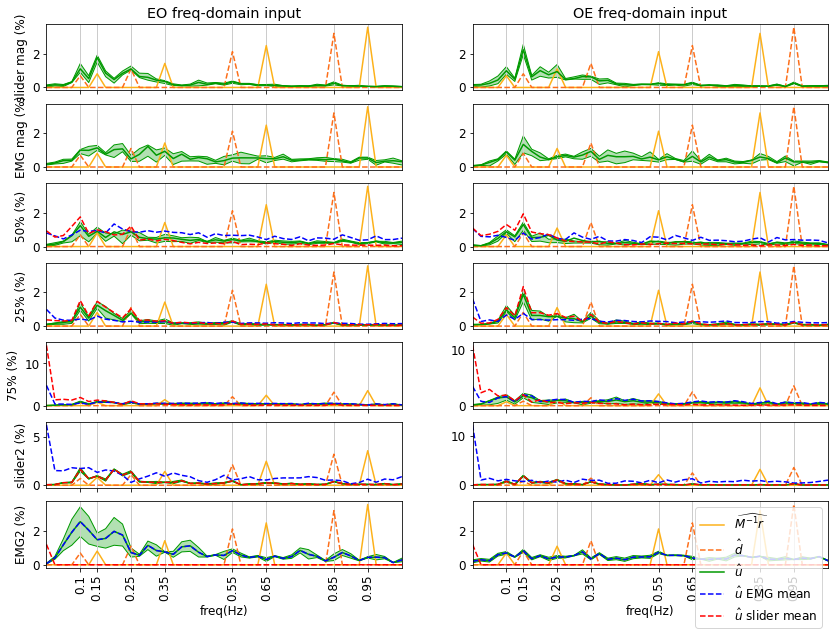

In [156]:
# (3)freq-domain input
fig,axs = plt.subplots(num_cond,2,sharex=True,figsize=(14,10))

for k in range(num_cond): #number of conditions

  condition = FREQ['condition'+str(k)]

  #Lists of Even (EO) and Odd (OE) trials
  EO = [x for x in range(trialnum[k]) if x % 2 == 0] # EO trials (ref - Even, dis - Odd)
  OE = [x for x in range(trialnum[k]) if x % 2 != 0]  # OE trials (ref - Odd, dis - Even)

  #seperate EO and OE trials
  input_even = [np.abs(condition['U'][i][:N//2]) for i in EO]
  input_even0 = [np.abs(condition['U0'][i][:N//2]) for i in EO]
  input_even1 = [np.abs(condition['U1'][i][:N//2]) for i in EO]  
  input_odd = [np.abs(condition['U'][i][:N//2]) for i in OE]
  input_odd0 = [np.abs(condition['U0'][i][:N//2]) for i in OE]
  input_odd1 = [np.abs(condition['U1'][i][:N//2]) for i in OE]

  #calculate input mean, 75 & 25 percentile
  condition['U_mean'] = [np.mean(input_even, axis=0), np.mean(input_odd, axis=0)]
  condition['U0_mean'] = [np.mean(input_even0, axis=0), np.mean(input_odd0, axis=0)] #mean emg input 
  condition['U1_mean'] = [np.mean(input_even1, axis=0), np.mean(input_odd1, axis=0)] #mean slider input 
  condition['U_75'] = [np.percentile(input_even, 75, axis=0), np.percentile(input_odd, 75, axis=0)]
  condition['U_25'] = [np.percentile(input_even, 25, axis=0), np.percentile(input_odd, 25, axis=0)]

  for i in range(2): #even or odd
    for ii in prime: # prime multiples of a base frequency (1/20Hz)
      axs[k,i].axvline(x = ii*base_freq,linewidth=1, color='0.8')
    axs[k,i].plot(xf,np.abs(condition['WR'][i][:N//2])*100,color=colors['r'],label=r'$\widehat{M^{-1}r}$') #reference
    axs[k,i].plot(xf,np.abs(condition['D'][i][:N//2])*100,'--',color=colors['d'],label=r'$\hat d$') #disturbance
    axs[k,i].plot(xf,condition['U_mean'][i]*100, color=colors['u'],label=r'$\hat u$') #input
    axs[k,i].fill_between(xf, condition['U_25'][i]*100, condition['U_75'][i]*100,
                          facecolor=ufill,edgecolor=colors['u'])
    axs[k,i].set_xlim((0,21*base_freq))
  if k >=2:
    for i in range(2): #even or odd
      # for the last condition (fusion), plot seperate emg and slider inputs
      axs[k,i].plot(xf,condition['U0_mean'][i]*100, 'b--',label=r'$\hat{u}$ EMG mean') #mean emg input
      axs[k,i].plot(xf,condition['U1_mean'][i]*100, 'r--',label=r'$\hat{u}$ slider mean')  #mean slider input

# plot labels
for i in range(2): #even or odd
  axs[num_cond-1,i].set_xlabel('freq(Hz)')
  axs[num_cond-1,i].set_xticks(prime*0.05)
  axs[num_cond-1,i].set_xticklabels(np.round(prime*0.05,2),rotation=90)
axs[0,0].title.set_text('EO freq-domain input')  
axs[0,1].title.set_text('OE freq-domain input')
axs[0,0].set_ylabel('slider mag (%)')
axs[1,0].set_ylabel('EMG mag (%)')
axs[2,0].set_ylabel('50% (%)')
axs[3,0].set_ylabel('25% (%)')
axs[4,0].set_ylabel('75% (%)')
axs[5,0].set_ylabel('slider2 (%)')
axs[6,0].set_ylabel('EMG2 (%)')
plt.legend(loc = 'upper right');
plt.show();

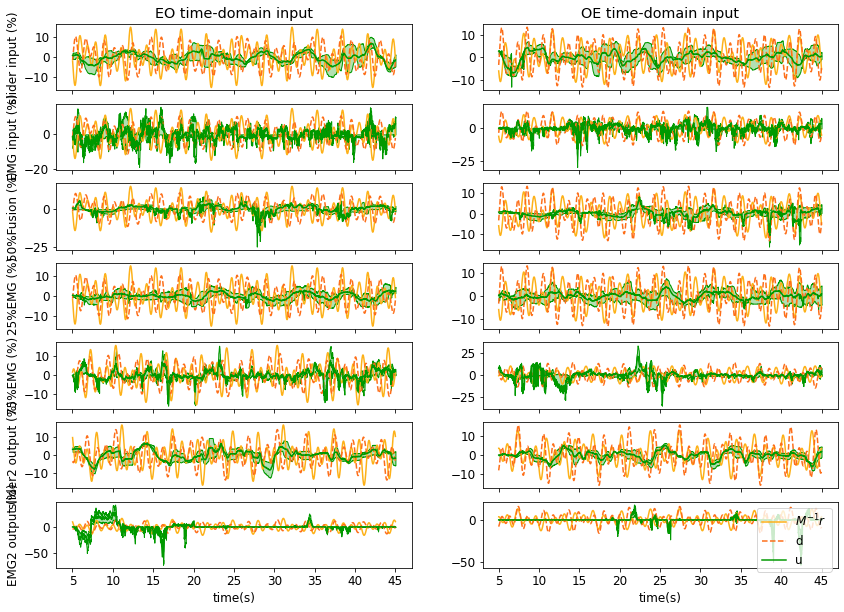

In [157]:
# (4)time-domain input
fig,axs = plt.subplots(num_cond,2,sharex=True,figsize=(14,10))

for k in range(num_cond): #number of conditions

  condition = TIME['condition'+str(k)]
  
  #Lists of Even (EO) and Odd (OE) trials
  EO = [x for x in range(trialnum[k]) if x % 2 == 0] # EO trials (ref - Even, dis - Odd)
  OE = [x for x in range(trialnum[k]) if x % 2 != 0]  # OE trials (ref - Odd, dis - Even)

  #seperate EO and OE trials
  input_even = [condition['u'][i] for i in EO]
  input_even0 = [condition['u0'][i] for i in EO]
  input_even1 = [condition['u1'][i] for i in EO]  
  input_odd = [condition['u'][i] for i in OE]
  input_odd0 = [condition['u0'][i] for i in OE]
  input_odd1 = [condition['u1'][i] for i in OE]

  #calculate input mean, 75 & 25 percentile
  condition['u_mean'] = [np.mean(input_even, axis=0), np.mean(input_odd, axis=0)]
  condition['u0_mean'] = [np.mean(input_even0, axis=0), np.mean(input_odd0, axis=0)]
  condition['u1_mean'] = [np.mean(input_even1, axis=0), np.mean(input_odd1, axis=0)]
  condition['u_75'] = [np.percentile(input_even, 75, axis=0), np.percentile(input_odd, 75, axis=0)]
  condition['u_25'] = [np.percentile(input_even, 25, axis=0), np.percentile(input_odd, 25, axis=0)]

  for i in range(2): #even or odd
    # plot time domain output
    axs[k,i].plot(t,condition['Wr'][i]*100,color=colors['r'],label='$M^{-1}r$') #reference
    axs[k,i].plot(t,condition['d'][i]*100,'--',color=colors['d'],label='d') #disturbance
    axs[k,i].plot(t,condition['u_mean'][i]*100,color=colors['u'],label='u') #input
    axs[k,i].fill_between(t, condition['u_25'][i]*100,condition['u_75'][i]*100,
                          facecolor=ufill,edgecolor=colors['u'])

axs[0,0].title.set_text('EO time-domain input')  
axs[0,1].title.set_text('OE time-domain input')
axs[num_cond-1,0].set_xlabel('time(s)')
axs[num_cond-1,1].set_xlabel('time(s)')
axs[0,0].set_ylabel('slider input (%)')
axs[1,0].set_ylabel('EMG input (%)')
axs[2,0].set_ylabel('Fusion input (%)')
axs[2,0].set_ylabel('50%Fusion (%)')
axs[3,0].set_ylabel('25%EMG (%)')
axs[4,0].set_ylabel('75%EMG (%)')
axs[5,0].set_ylabel('slider2 output (%)')
axs[6,0].set_ylabel('EMG2 output (%)')
plt.legend(loc = 'upper right');
plt.show();

In [158]:
# # (4)time-domain input
# fig,axs = plt.subplots(4,2,sharex=True,figsize=(14,10))

# for k in range(3): #number of conditions

#   condition = TIME['condition'+str(k)]

#   #seperate EO and OE trials
#   input_even = [condition['u'][i] for i in EO]
#   input_even0 = [condition['u0'][i] for i in EO]
#   input_even1 = [condition['u1'][i] for i in EO]  
#   input_odd = [condition['u'][i] for i in OE]
#   input_odd0 = [condition['u0'][i] for i in OE]
#   input_odd1 = [condition['u1'][i] for i in OE]

#   #calculate input mean, 75 & 25 percentile
#   condition['u_mean'] = [np.mean(input_even, axis=0), np.mean(input_odd, axis=0)]
#   condition['u0_mean'] = [np.mean(input_even0, axis=0), np.mean(input_odd0, axis=0)]
#   condition['u1_mean'] = [np.mean(input_even1, axis=0), np.mean(input_odd1, axis=0)]
#   condition['u_75'] = [np.percentile(input_even, 75, axis=0), np.percentile(input_odd, 75, axis=0)]
#   condition['u_25'] = [np.percentile(input_even, 25, axis=0), np.percentile(input_odd, 25, axis=0)]

#   for i in range(2): #even or odd
#     # plot time domain output
#     axs[k,i].plot(t,condition['Wr'][i]*100,color=colors['r'],label='$M^{-1}r$') #reference
#     axs[k,i].plot(t,condition['d'][i]*100,'--',color=colors['d'],label='d') #disturbance
#     axs[k,i].plot(t,condition['u_mean'][i]*100,color=colors['u'],label='u') #input
#     axs[k,i].fill_between(t, condition['u_25'][i]*100,condition['u_75'][i]*100,
#                           facecolor=ufill,edgecolor=colors['u'])

# for i in range(2): #even or odd
#   axs[3,i].plot(t,condition['Wr'][i]*100,color=colors['r'],label='$M^{-1}r$') #reference
#   axs[3,i].plot(t,condition['d'][i]*100,'--',color=colors['d'],label='d') #disturbance
#   axs[3,i].plot(t,condition['u0_mean'][i]*100,'b--',label='u EMG mean') #mean emg input
#   axs[3,i].plot(t,condition['u1_mean'][i]*100,'r--',label='u slider mean') #mean slider input

# axs[0,0].title.set_text('EO time-domain input')  
# axs[0,1].title.set_text('OE time-domain input')
# axs[3,0].set_xlabel('time(s)')
# axs[3,1].set_xlabel('time(s)')
# axs[0,0].set_ylabel('slider input (%)')
# axs[1,0].set_ylabel('EMG input (%)')
# axs[2,0].set_ylabel('Fusion input (%)')
# axs[3,0].set_ylabel('Separate(%)')
# plt.legend(loc = 'upper right');
# plt.show();

# Tur & Tud at simulated freq


In [159]:
# for each condition, find distribution of Tur and Tud, and plot:
sitimulated_index = prime*2 #array([ 4,  6, 10, 14, 22, 26, 34, 38])
sitimulated_freq = prime*base_freq

def TUR_TUD(condition,input_type,trialnum): #input_type = 'U', 'U0'(emg in fusion), or 'U1'(slider in fusion)
  #find index of simulated freqs: trial 0 is EO (ref - Even, dis - Odd)
  Even_index = (np.where(abs(condition['R'][0]) > 1e-12)[0])[:4] #array([ 6, 14, 26, 38])
  Odd_index = (np.where(abs(condition['D'][0]) > 1e-12)[0])[:4]  #array([ 4, 10, 22, 34])

  #R,D in EO trials, without zeros
  even_R = condition['R'][0][Even_index] #even R without zeros
  odd_D = condition['D'][0][Odd_index] #odd D without zeros

  #R,D in OE trials, without zeros
  odd_R = condition['R'][1][Odd_index] #odd R without zeros
  even_D = condition['D'][1][Even_index] #even D without zeros

  #number of Tur & Tud = half(trials) (1 EO & 1 OE trial together as one)
  Tur = np.zeros((math.ceil(trialnum/2),8), dtype=complex) #number of stimulatd freqs = 8
  Tud = np.zeros((math.ceil(trialnum/2),8), dtype=complex)

  # U at simulated freqs
  even_U = []; odd_U = []
  for i in range(trialnum): #all trials in a condition
    even_U.append( condition[input_type][i][Even_index] )
    odd_U.append( condition[input_type][i][Odd_index] )
  
  #Lists of Even (EO) and Odd (OE) trials
  EO = [x for x in range(trialnum) if x % 2 == 0] # EO trials (ref - Even, dis - Odd)
  OE = [x for x in range(trialnum) if x % 2 != 0]  # OE trials (ref - Odd, dis - Even)

  # Tur & Tud at simulated freqs
  for i in EO: #EO trials = [0,2,4 ...] (ref - Even, dis - Odd)
    Tur[i//2][::2] = even_U[i] / even_R 
    Tud[i//2][1::2] = odd_U[i] / odd_D 
  for i in OE: #OE trials = [1,3,5 ...] (ref - Odd, dis - Even)
    Tur[i//2][1::2] = odd_U[i] / odd_R 
    Tud[i//2][::2] = even_U[i] / even_D 

  return Tur, Tud

In [160]:
#calculate Tur and Tud (Fig 4)
Tur_slider, Tud_slider = TUR_TUD(FREQ['condition0'],'U',trialnum[0])
Tur_emg, Tud_emg = TUR_TUD(FREQ['condition1'],'U',trialnum[1])
Tur_fusion50, Tud_fusion50 = TUR_TUD(FREQ['condition2'],'U',trialnum[2])
Tur_fusion25, Tud_fusion25 = TUR_TUD(FREQ['condition3'],'U',trialnum[3])
Tur_fusion75, Tud_fusion75 = TUR_TUD(FREQ['condition4'],'U',trialnum[4])
Tur_slider2, Tud_slider2 = TUR_TUD(FREQ['condition5'],'U',trialnum[5])
Tur_emg2, Tud_emg2 = TUR_TUD(FREQ['condition6'],'U',trialnum[6])

#create dict
TUR = { 'condition0': Tur_slider, 
        'condition1': Tur_emg,
        'condition2': Tur_fusion50,
        'condition3': Tur_fusion25,
        'condition4': Tur_fusion75,
        'condition5': Tur_slider2, 
        'condition6': Tur_emg2}
TUD = { 'condition0': Tud_slider, 
        'condition1': Tud_emg,
        'condition2': Tud_fusion50,
        'condition3': Tud_fusion25,
        'condition4': Tud_fusion75,
        'condition5': Tud_slider2, 
        'condition6': Tud_emg2}

In [161]:
def Plot_TUR_TUD(Tur, Tud, figname,trialnum):
  # mag & phase
  Tur_mag = abs(Tur)
  Tud_mag = abs(Tud)
  Tur_phase = np.angle(Tur)
  Tud_phase = np.angle(Tud)

  # mean & percentile
  Tur_mag_mean = np.mean(Tur_mag,axis=0)
  Tur_mag_75 = np.percentile(Tur_mag, 75, axis=0)
  Tur_mag_25 = np.percentile(Tur_mag, 25, axis=0)

  Tud_mag_mean = np.mean(Tud_mag,axis=0)
  Tud_mag_75 = np.percentile(Tud_mag, 75, axis=0)
  Tud_mag_25 = np.percentile(Tud_mag, 25, axis=0)

  Tur_phase_mean = np.mean(Tur_phase,axis=0)
  Tur_phase_75 = np.percentile(Tur_phase, 75, axis=0)
  Tur_phase_25 = np.percentile(Tur_phase, 25, axis=0)

  Tud_phase_mean = np.mean(Tud_phase,axis=0)
  Tud_phase_75 = np.percentile(Tud_phase, 75, axis=0)
  Tud_phase_25 = np.percentile(Tud_phase, 25, axis=0)

  # plot Tur and Tud 
  fig,axs = plt.subplots(2, 2)
  xlim = (sitimulated_freq[0]-.01,sitimulated_freq[-1]+.1)
  xticks = prime*0.05
  xticklabels =np.round(prime*0.05,2)
  ylimmag = (1e-1,1.5e1)
  yticksmag = [0.1,1,10]
  ylimphase = (-np.pi,np.pi)
  yticksphase = [-np.pi,0.,np.pi]
  yticklabelsphase = [r'$-\pi$',r'0',r'$+\pi$']
  
  ax = axs[0,0]
  for i in range(math.ceil(trialnum/2)):
    ax.plot(sitimulated_freq, Tud_mag[i], '*--', color='0.8') 
  ax.plot(sitimulated_freq, Tud_mag_mean, 'o-', color=colors['d'], label = 'Tud')
  ax.errorbar(x=sitimulated_freq, y=Tud_mag_mean, xerr=None,
              yerr=np.asarray([Tud_mag_mean-Tud_mag_25, Tud_mag_75-Tud_mag_mean]),
              color='k',ls='none',zorder=10)
  ax.plot(xlim,[1.,1.],'k--',zorder=-1)
  ax.set_xscale("log")
  ax.set_xticks([])
  ax.set_xticklabels([])
  ax.set_xlim(xlim)
  # ax.set_ylim(ylimmag)
  ax.set_ylabel('gain')
  # ax.set_yticks(yticksmag) 
  ax.title.set_text(r'$\widehat{Tud}$') 

  ax = axs[1,0]
  for i in range(math.ceil(trialnum/2)):
    ax.plot(sitimulated_freq, Tud_phase[i], '*--', color='0.8') 
  ax.plot(sitimulated_freq, Tud_phase_mean, 'o-', color=colors['d'], label = 'Tud')
  ax.errorbar(x=sitimulated_freq, y=Tud_phase_mean, xerr=None,
              yerr=np.asarray([Tud_phase_mean-Tud_phase_25, Tud_phase_75-Tud_phase_mean]),
              color='k',ls='none',zorder=10)
  ax.plot(xlim,[0.,0.],'k--',zorder=-1)
  ax.set_xscale("log")
  ax.set_xlim(xlim)
  ax.set_ylim(ylimphase)
  ax.set_xticks(xticks)
  ax.set_xticklabels(xticklabels,rotation=90)
  ax.set_ylabel('phase (raidans)')
  ax.set_yticks(yticksphase) 
  ax.set_yticklabels(yticklabelsphase,**font)

  ax = axs[0,1]
  for i in range(math.ceil(trialnum/2)):
    ax.plot(sitimulated_freq, Tur_mag[i], '*--', color='0.8') 
  ax.plot(sitimulated_freq, Tur_mag_mean, 'o-', color=colors['r'], label = 'Tur')
  ax.errorbar(x=sitimulated_freq, y=Tur_mag_mean, xerr=None,
              yerr=np.asarray([Tur_mag_mean-Tur_mag_25, Tur_mag_75-Tur_mag_mean]),
              color='k',ls='none',zorder=10)
  ax.plot(xlim,[1.,1.],'k--',zorder=-1)
  ax.set_xscale("log")
  ax.set_xticks([])
  ax.set_xticklabels([])
  ax.set_xlim(xlim)
  # ax.set_ylim(ylimmag)
  ax.title.set_text(r'$\widehat{Tur}$')

  ax = axs[1,1]
  for i in range(math.ceil(trialnum/2)):
    ax.plot(sitimulated_freq, Tur_phase[i], '*--', color='0.8') 
  ax.plot(sitimulated_freq, Tur_phase_mean, 'o-', color=colors['r'], label = 'Tur')
  ax.errorbar(x=sitimulated_freq, y=Tur_phase_mean, xerr=None,
              yerr=np.asarray([Tur_phase_mean-Tur_phase_25, Tur_phase_75-Tur_phase_mean]),
              color='k',ls='none',zorder=10)
  ax.plot(xlim,[0.,0.],'k--',zorder=-1)
  ax.set_xscale("log")
  ax.set_xlim(xlim)
  ax.set_ylim(ylimphase)
  ax.set_xticks(xticks)
  ax.set_xticklabels(xticklabels,rotation=90)
  ax.set_yticks([])
  ax.set_yticklabels([])

  fig.suptitle(figname);
  plt.tight_layout();
  plt.show();

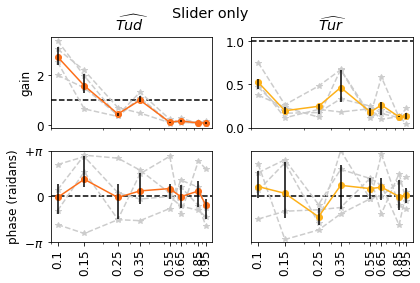

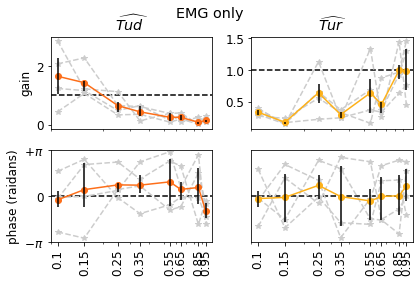

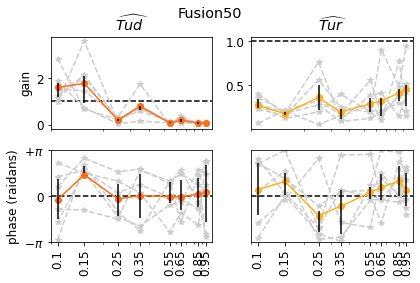

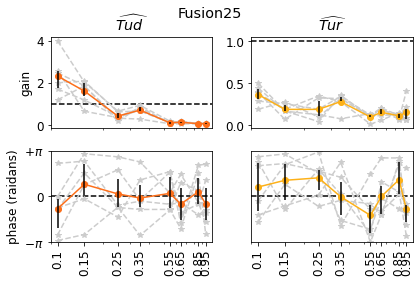

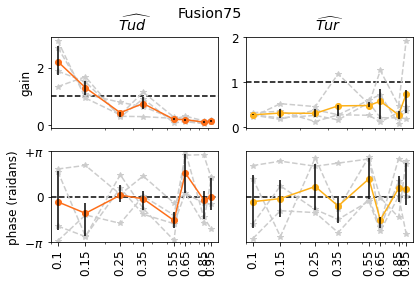

In [162]:
#plot Tur and Tud (Fig 4)
Plot_TUR_TUD(Tur_slider, Tud_slider,'Slider only',trialnum[0])
Plot_TUR_TUD(Tur_emg, Tud_emg,'EMG only',trialnum[1])
Plot_TUR_TUD(Tur_fusion50, Tud_fusion50,'Fusion50',trialnum[2])
Plot_TUR_TUD(Tur_fusion25, Tud_fusion25,'Fusion25',trialnum[3])
Plot_TUR_TUD(Tur_fusion75, Tud_fusion75,'Fusion75',trialnum[4])

In [163]:
# #calculate Tur and Tud of fusion, EMG in fusion, and slider in fusion
# Tur_fusion, Tud_fusion = TUR_TUD(FREQ['condition2'],'U')
# Tur_fusion_emg, Tud_fusion_emg = TUR_TUD(FREQ['condition2'],'U0')
# Tur_fusion_slider, Tud_fusion_slider= TUR_TUD(FREQ['condition2'],'U1')

# #create dict
# TUR_fusion = { 'fusion': Tur_fusion, 
#                 'fusion_emg': Tur_fusion_emg,
#                 'fusion_slider': Tur_fusion_slider}
# TUD_fusion = { 'fusion': Tud_fusion, 
#                 'fusion_emg': Tud_fusion_emg,
#                 'fusion_slider': Tud_fusion_slider}

In [164]:
# #plot Tur and Tud for separate emg and slider input in fusion
# Plot_TUR_TUD(Tur_fusion, Tud_fusion,'Fusion')
# Plot_TUR_TUD(Tur_fusion_emg, Tud_fusion_emg,'EMG in fusion')
# Plot_TUR_TUD(Tur_fusion_slider, Tud_fusion_slider,'Slider in fusion')

## Tu0r and Tu0d (EMG signals)

In [165]:
#calculate Tur and Tud (Fig 4)
Tur_slider, Tud_slider = TUR_TUD(FREQ['condition0'],'U0',trialnum[0])
Tur_emg, Tud_emg = TUR_TUD(FREQ['condition1'],'U0',trialnum[1])
Tur_fusion50, Tud_fusion50 = TUR_TUD(FREQ['condition2'],'U0',trialnum[2])
Tur_fusion25, Tud_fusion25 = TUR_TUD(FREQ['condition3'],'U0',trialnum[3])
Tur_fusion75, Tud_fusion75 = TUR_TUD(FREQ['condition4'],'U0',trialnum[4])
Tur_slider2, Tud_slider2 = TUR_TUD(FREQ['condition5'],'U0',trialnum[5])
Tur_emg2, Tud_emg2 = TUR_TUD(FREQ['condition6'],'U0',trialnum[6])

#create dict
TU0R = { 'condition0': Tur_slider, 
        'condition1': Tur_emg,
        'condition2': Tur_fusion50,
        'condition3': Tur_fusion25,
        'condition4': Tur_fusion75,
        'condition5': Tur_slider2, 
        'condition6': Tur_emg2}
TU0D = { 'condition0': Tud_slider, 
        'condition1': Tud_emg,
        'condition2': Tud_fusion50,
        'condition3': Tud_fusion25,
        'condition4': Tud_fusion75,
        'condition5': Tud_slider2, 
        'condition6': Tud_emg2}

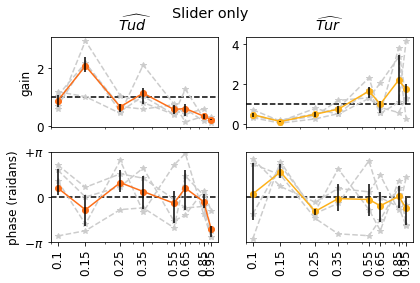

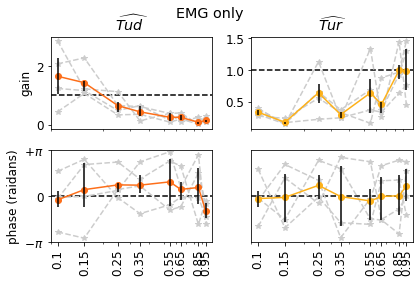

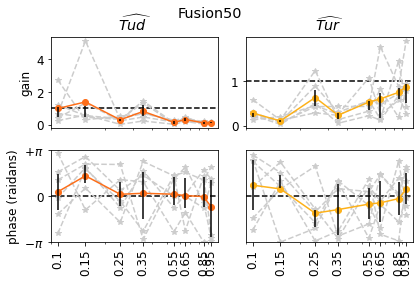

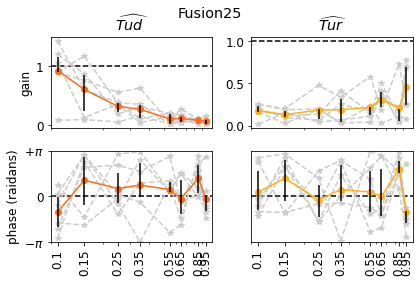

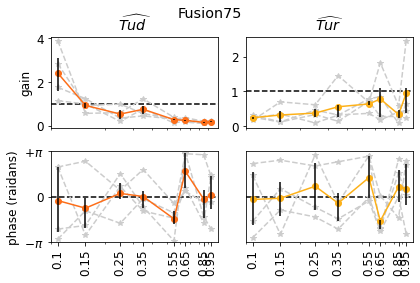

In [166]:
#plot Tu0r and T0d (Fig 4)
Plot_TUR_TUD(Tur_slider, Tud_slider,'Slider only',trialnum[0])
Plot_TUR_TUD(Tur_emg, Tud_emg,'EMG only',trialnum[1])
Plot_TUR_TUD(Tur_fusion50, Tud_fusion50,'Fusion50',trialnum[2])
Plot_TUR_TUD(Tur_fusion25, Tud_fusion25,'Fusion25',trialnum[3])
Plot_TUR_TUD(Tur_fusion75, Tud_fusion75,'Fusion75',trialnum[4])

## Tu1r & Tu1d (Slider signals)

In [167]:
#calculate Tur and Tud (Fig 4)
Tur_slider, Tud_slider = TUR_TUD(FREQ['condition0'],'U1',trialnum[0])
Tur_emg, Tud_emg = TUR_TUD(FREQ['condition1'],'U1',trialnum[1])
Tur_fusion50, Tud_fusion50 = TUR_TUD(FREQ['condition2'],'U1',trialnum[2])
Tur_fusion25, Tud_fusion25 = TUR_TUD(FREQ['condition3'],'U1',trialnum[3])
Tur_fusion75, Tud_fusion75 = TUR_TUD(FREQ['condition4'],'U1',trialnum[4])
Tur_slider2, Tud_slider2 = TUR_TUD(FREQ['condition5'],'U1',trialnum[5])
Tur_emg2, Tud_emg2 = TUR_TUD(FREQ['condition6'],'U1',trialnum[6])

#create dict
TU1R = { 'condition0': Tur_slider, 
        'condition1': Tur_emg,
        'condition2': Tur_fusion50,
        'condition3': Tur_fusion25,
        'condition4': Tur_fusion75,
        'condition5': Tur_slider2, 
        'condition6': Tur_emg2}
TU1D = { 'condition0': Tud_slider, 
        'condition1': Tud_emg,
        'condition2': Tud_fusion50,
        'condition3': Tud_fusion25,
        'condition4': Tud_fusion75,
        'condition5': Tud_slider2, 
        'condition6': Tud_emg2}

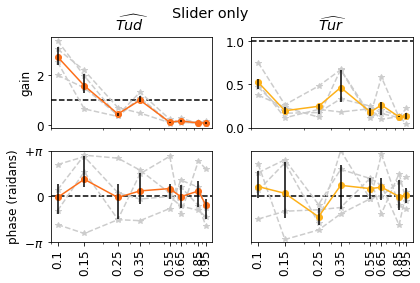

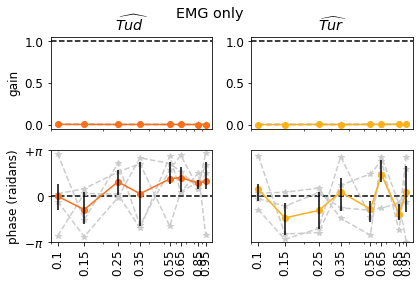

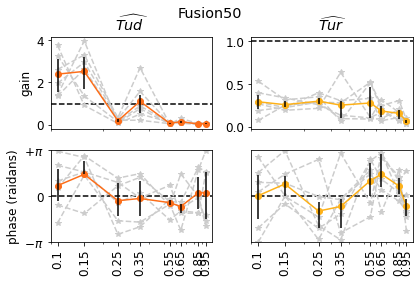

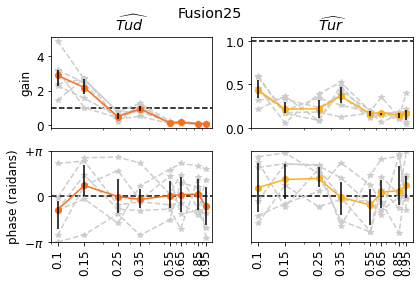

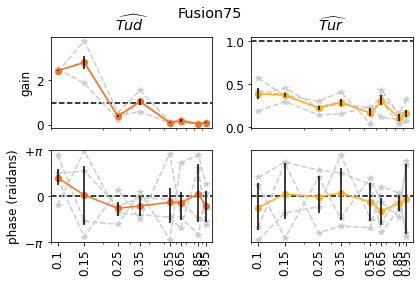

In [168]:
#plot Tu0r and T0d (Fig 4)
Plot_TUR_TUD(Tur_slider, Tud_slider,'Slider only',trialnum[0])
Plot_TUR_TUD(Tur_emg, Tud_emg,'EMG only',trialnum[1])
Plot_TUR_TUD(Tur_fusion50, Tud_fusion50,'Fusion50',trialnum[2])
Plot_TUR_TUD(Tur_fusion25, Tud_fusion25,'Fusion25',trialnum[3])
Plot_TUR_TUD(Tur_fusion75, Tud_fusion75,'Fusion75',trialnum[4])

# Tyr & Tyd at simulated freq


In [169]:
# for each condition, find distribution of Tyr and Tyd, and plot:

def TYR_TYD(condition,trialnum):

  #find index of simulated freqs: trial 0 is EO (ref - Even, dis - Odd)
  Even_index = (np.where(abs(condition['R'][0]) > 1e-12)[0])[:4] #array([ 6, 14, 26, 38])
  Odd_index = (np.where(abs(condition['D'][0]) > 1e-12)[0])[:4]  #array([ 4, 10, 22, 34])

  #R,D in EO trials, without zeros
  even_R = condition['R'][0][Even_index] #even R without zeros
  odd_D = condition['D'][0][Odd_index] #odd D without zeros

  #R,D in OE trials, without zeros
  odd_R = condition['R'][1][Odd_index] #odd R without zeros
  even_D = condition['D'][1][Even_index] #even D without zeros

  #number of Tyr & Tyd = half(trials) (1 EO & 1 OE trial together as one)
  Tyr = np.zeros((math.ceil(trialnum/2),8), dtype=complex) #number of stimulatd freqs = 8
  Tyd = np.zeros((math.ceil(trialnum/2),8), dtype=complex)

  # Y at simulated freqs
  even_Y = []; odd_Y = []
  for i in range(trialnum): #all trials in a condition
    even_Y.append( condition['Y'][i][Even_index] )
    odd_Y.append( condition['Y'][i][Odd_index] )

  #Lists of Even (EO) and Odd (OE) trials
  EO = [x for x in range(trialnum) if x % 2 == 0] # EO trials (ref - Even, dis - Odd)
  OE = [x for x in range(trialnum) if x % 2 != 0]  # OE trials (ref - Odd, dis - Even)

  # Tyr & Tyd at simulated freqs
  for i in EO: #EO trials = [0,2,4 ...] (ref - Even, dis - Odd)
    Tyr[i//2][::2] = even_Y[i] / even_R 
    Tyd[i//2][1::2] = odd_Y[i] / odd_D 
  for i in OE: #OE trials = [1,3,5 ...] (ref - Odd, dis - Even)
    Tyr[i//2][1::2] = odd_Y[i] / odd_R 
    Tyd[i//2][::2] = even_Y[i] / even_D 

  return Tyr, Tyd

In [170]:
#calculate Tyr and Tyd (Fig 4)
Tyr_slider, Tyd_slider = TYR_TYD(FREQ['condition0'],trialnum[0])
Tyr_emg, Tyd_emg = TYR_TYD(FREQ['condition1'],trialnum[1])
Tyr_fusion50, Tyd_fusion50 = TYR_TYD(FREQ['condition2'],trialnum[2])
Tyr_fusion25, Tyd_fusion25 = TYR_TYD(FREQ['condition3'],trialnum[3])
Tyr_fusion75, Tyd_fusion75 = TYR_TYD(FREQ['condition4'],trialnum[4])
Tyr_slider2, Tyd_slider2 = TYR_TYD(FREQ['condition5'],trialnum[5])
Tyr_emg2, Tyd_emg2 = TYR_TYD(FREQ['condition6'],trialnum[6])

#create dict
TYR = { 'condition0': Tyr_slider, 
        'condition1': Tyr_emg,
        'condition2': Tyr_fusion50,
        'condition3': Tyr_fusion25,
        'condition4': Tyr_fusion75,
        'condition5': Tyr_slider2, 
        'condition6': Tyr_emg2}
TYD = { 'condition0': Tyd_slider, 
        'condition1': Tyd_emg,
        'condition2': Tyd_fusion50,
        'condition3': Tyd_fusion25,
        'condition4': Tyd_fusion75,
        'condition5': Tyd_slider2, 
        'condition6': Tyd_emg2}

In [171]:
def Plot_TYR_TYD(Tyr, Tyd, figname,trialnum):
  # mag & phase
  Tyr_mag = abs(Tyr)
  Tyd_mag = abs(Tyd)
  Tyr_phase = np.angle(Tyr)
  Tyd_phase = np.angle(Tyd)

  # mean & percentile
  Tyr_mag_mean = np.mean(Tyr_mag,axis=0)
  Tyr_mag_75 = np.percentile(Tyr_mag, 75, axis=0)
  Tyr_mag_25 = np.percentile(Tyr_mag, 25, axis=0)

  Tyd_mag_mean = np.mean(Tyd_mag,axis=0)
  Tyd_mag_75 = np.percentile(Tyd_mag, 75, axis=0)
  Tyd_mag_25 = np.percentile(Tyd_mag, 25, axis=0)

  Tyr_phase_mean = np.mean(Tyr_phase,axis=0)
  Tyr_phase_75 = np.percentile(Tyr_phase, 75, axis=0)
  Tyr_phase_25 = np.percentile(Tyr_phase, 25, axis=0)

  Tyd_phase_mean = np.mean(Tyd_phase,axis=0)
  Tyd_phase_75 = np.percentile(Tyd_phase, 75, axis=0)
  Tyd_phase_25 = np.percentile(Tyd_phase, 25, axis=0)

  # plot Tyr and Tyd 
  fig,axs = plt.subplots(2, 2)
  xlim = (sitimulated_freq[0]-.01,sitimulated_freq[-1]+.1)
  xticks = prime*0.05
  xticklabels =np.round(prime*0.05,2)
  ylimmag = (1e-1,1.5e1)
  yticksmag = [0.1,1,10]
  ylimphase = (-np.pi,np.pi)
  yticksphase = [-np.pi,0.,np.pi]
  yticklabelsphase = [r'$-\pi$',r'0',r'$+\pi$']
  
  ax = axs[0,0]
  for i in range(math.ceil(trialnum/2)):
    ax.plot(sitimulated_freq, Tyd_mag[i], '*--', color='0.8') 
  ax.plot(sitimulated_freq, Tyd_mag_mean, 'o-', color=colors['d'], label = 'Tyd')
  ax.errorbar(x=sitimulated_freq, y=Tyd_mag_mean, xerr=None,
              yerr=np.asarray([Tyd_mag_mean-Tyd_mag_25, Tyd_mag_75-Tyd_mag_mean]),
              color='k',ls='none',zorder=10)
  ax.plot(xlim,[1.,1.],'k--',zorder=-1)
  ax.set_xscale("log")
  ax.set_xticks([])
  ax.set_xticklabels([])
  ax.set_xlim(xlim)
  # ax.set_ylim(ylimmag)
  ax.set_ylabel('gain')
  # ax.set_yticks(yticksmag) 
  ax.title.set_text(r'$\widehat{Tyd}$') 

  ax = axs[1,0]
  for i in range(math.ceil(trialnum/2)):
    ax.plot(sitimulated_freq, Tyd_phase[i], '*--', color='0.8') 
  ax.plot(sitimulated_freq, Tyd_phase_mean, 'o-', color=colors['d'], label = 'Tyd')
  ax.errorbar(x=sitimulated_freq, y=Tyd_phase_mean, xerr=None,
              yerr=np.asarray([Tyd_phase_mean-Tyd_phase_25, Tyd_phase_75-Tyd_phase_mean]),
              color='k',ls='none',zorder=10)
  ax.plot(xlim,[0.,0.],'k--',zorder=-1)
  ax.set_xscale("log")
  ax.set_xlim(xlim)
  ax.set_ylim(ylimphase)
  ax.set_xticks(xticks)
  ax.set_xticklabels(xticklabels,rotation=90)
  ax.set_ylabel('phase (raidans)')
  ax.set_yticks(yticksphase) 
  ax.set_yticklabels(yticklabelsphase,**font)

  ax = axs[0,1]
  for i in range(math.ceil(trialnum/2)):
    ax.plot(sitimulated_freq, Tyr_mag[i], '*--', color='0.8') 
  ax.plot(sitimulated_freq, Tyr_mag_mean, 'o-', color=colors['r'], label = 'Tyr')
  ax.errorbar(x=sitimulated_freq, y=Tyr_mag_mean, xerr=None,
              yerr=np.asarray([Tyr_mag_mean-Tyr_mag_25, Tyr_mag_75-Tyr_mag_mean]),
              color='k',ls='none',zorder=10)
  ax.plot(xlim,[1.,1.],'k--',zorder=-1)
  ax.set_xscale("log")
  ax.set_xticks([])
  ax.set_xticklabels([])
  ax.set_xlim(xlim)
  # ax.set_ylim(ylimmag)
  ax.title.set_text(r'$\widehat{Tyr}$')

  ax = axs[1,1]
  for i in range(math.ceil(trialnum/2)):
    ax.plot(sitimulated_freq, Tyr_phase[i], '*--', color='0.8') 
  ax.plot(sitimulated_freq, Tyr_phase_mean, 'o-', color=colors['r'], label = 'Tyr')
  ax.errorbar(x=sitimulated_freq, y=Tyr_phase_mean, xerr=None,
              yerr=np.asarray([Tyr_phase_mean-Tyr_phase_25, Tyr_phase_75-Tyr_phase_mean]),
              color='k',ls='none',zorder=10)
  ax.plot(xlim,[0.,0.],'k--',zorder=-1)
  ax.set_xscale("log")
  ax.set_xlim(xlim)
  ax.set_ylim(ylimphase)
  ax.set_xticks(xticks)
  ax.set_xticklabels(xticklabels,rotation=90)
  ax.set_yticks([])
  ax.set_yticklabels([])

  fig.suptitle(figname);
  plt.tight_layout();
  plt.show();

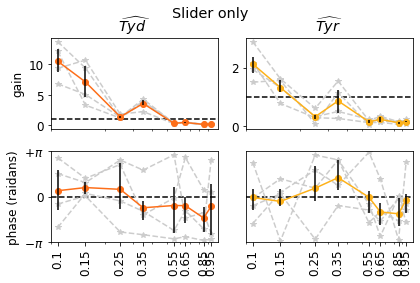

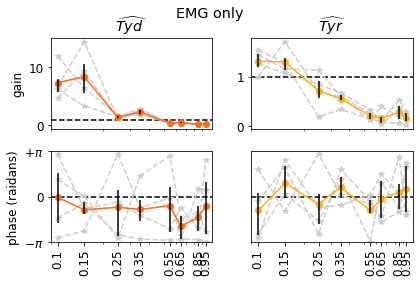

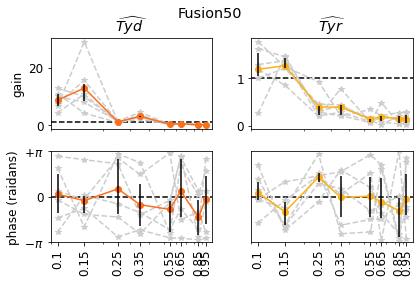

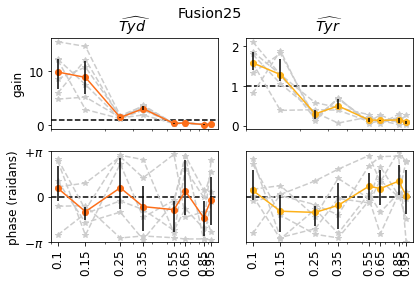

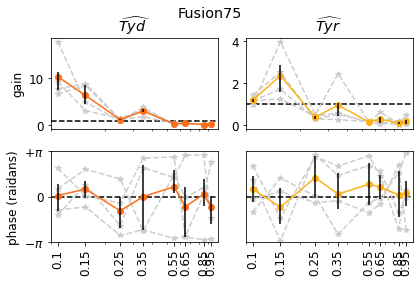

In [172]:
#plot Tur and Tud (Fig 4)
Plot_TYR_TYD(Tyr_slider, Tyd_slider,'Slider only',trialnum[0])
Plot_TYR_TYD(Tyr_emg, Tyd_emg,'EMG only',trialnum[1])
Plot_TYR_TYD(Tyr_fusion50, Tyd_fusion50,'Fusion50',trialnum[2])
Plot_TYR_TYD(Tyr_fusion25, Tyd_fusion25,'Fusion25',trialnum[3])
Plot_TYR_TYD(Tyr_fusion75, Tyd_fusion75,'Fusion75',trialnum[4])

# F & B at stimulated freq

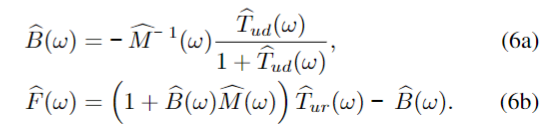

In [173]:
def F_B(Tur,Tud,trialnum):
  F = np.zeros((math.ceil(trialnum/2),8), dtype=complex) #number of stimulatd freqs = 8
  B = np.zeros((math.ceil(trialnum/2),8), dtype=complex)
  for i in range(math.ceil(trialnum/2)):
    B[i] = - (1 / M_h[sitimulated_index]) * (Tud[i] / (1+ Tud[i])) 
    F[i] = (1 + B[i] * M_h[sitimulated_index])*Tur[i] - B[i]
  return F,B

In [174]:
#calculate F & B (Fig 8)
F_slider,B_slider = F_B(TUR['condition0'],TUD['condition0'],trialnum[0])
F_emg,B_emg = F_B(TUR['condition1'],TUD['condition1'],trialnum[1])
F_fusion50,B_fusion50 = F_B(TUR['condition2'],TUD['condition2'],trialnum[2])
F_fusion25,B_fusion25 = F_B(TUR['condition3'],TUD['condition3'],trialnum[3])
F_fusion75,B_fusion75 = F_B(TUR['condition4'],TUD['condition4'],trialnum[4])
F_slider2,B_slider2 = F_B(TUR['condition5'],TUD['condition5'],trialnum[5])
F_emg2,B_emg2 = F_B(TUR['condition6'],TUD['condition6'],trialnum[6])

#create dict
F = { 'condition0': F_slider, 
      'condition1': F_emg,
      'condition2': F_fusion50,
      'condition3': F_fusion25,
      'condition4': F_fusion75,
      'condition5': F_slider2, 
      'condition6': F_emg2}
B = { 'condition0': B_slider, 
      'condition1': B_emg,
      'condition2': B_fusion50,
      'condition3': B_fusion25,
      'condition4': B_fusion75,
      'condition5': B_slider2, 
      'condition6': B_emg2}

In [175]:
def Plot_F_B(F, B, figname,trialnum):
  # mag & phase
  F_mag = abs(F)
  B_mag = abs(B)
  F_phase = np.angle(F)
  B_phase = np.angle(B)
  M_mag = abs(1 / M_h[sitimulated_index])
  M_phase = np.angle(1 / M_h[sitimulated_index])

  # mean & percentile
  F_mag_mean = np.mean(F_mag,axis=0)
  F_mag_75 = np.percentile(F_mag, 75, axis=0)
  F_mag_25 = np.percentile(F_mag, 25, axis=0)

  B_mag_mean = np.mean(B_mag,axis=0)
  B_mag_75 = np.percentile(B_mag, 75, axis=0)
  B_mag_25 = np.percentile(B_mag, 25, axis=0)

  F_phase_mean = np.mean(F_phase,axis=0)
  F_phase_75 = np.percentile(F_phase, 75, axis=0)
  F_phase_25 = np.percentile(F_phase, 25, axis=0)

  B_phase_mean = np.mean(B_phase,axis=0)
  B_phase_75 = np.percentile(B_phase, 75, axis=0)
  B_phase_25 = np.percentile(B_phase, 25, axis=0)

  # plot F and B 
  fig,axs = plt.subplots(2, 2)
  xlim = (sitimulated_freq[0]-.01,sitimulated_freq[-1]+.1)
  xticks = prime*0.05
  xticklabels =np.round(prime*0.05,2)
  ylimmag = (1e-1,1.5e1)
  yticksmag = [0.1,1,10]
  ylimphase = (-np.pi,np.pi)
  yticksphase = [-np.pi,0.,np.pi]
  yticklabelsphase = [r'$-\pi$',r'0',r'$+\pi$']
  
  ax = axs[0,0]
  for i in range(math.ceil(trialnum/2)):
    ax.plot(sitimulated_freq, B_mag[i], '*--', color='0.8') 
  ax.plot(sitimulated_freq, B_mag_mean, 'o-', color=colors['F'], label = 'B')
  ax.errorbar(x=sitimulated_freq, y=B_mag_mean, xerr=None,
              yerr=np.asarray([B_mag_mean-B_mag_25, B_mag_75-B_mag_mean]),
              color='k',ls='none',zorder=10)
  ax.plot(xlim,[1.,1.],'k--',zorder=-1)
  ax.set_xscale("log")
  ax.set_xticks([])
  ax.set_xticklabels([])
  ax.set_xlim(xlim)
  ax.set_ylabel('gain') 
  ax.title.set_text(r'$\widehat{B}$') 

  ax = axs[1,0]
  for i in range(math.ceil(trialnum/2)):
    ax.plot(sitimulated_freq, B_phase[i], '*--', color='0.8') 
  ax.plot(sitimulated_freq, B_phase_mean, 'o-', color=colors['F'], label = 'B')
  ax.errorbar(x=sitimulated_freq, y=B_phase_mean, xerr=None,
              yerr=np.asarray([B_phase_mean-B_phase_25, B_phase_75-B_phase_mean]),
              color='k',ls='none',zorder=10)
  ax.plot(xlim,[0.,0.],'k--',zorder=-1)
  ax.set_xscale("log")
  ax.set_xlim(xlim)
  ax.set_ylim(ylimphase)
  ax.set_xticks(xticks)
  ax.set_xticklabels(xticklabels,rotation=90)
  ax.set_ylabel('phase (raidans)')
  ax.set_yticks(yticksphase) 
  ax.set_yticklabels(yticklabelsphase,**font)

  ax = axs[0,1]
  for i in range(math.ceil(trialnum/2)):
    ax.plot(sitimulated_freq, F_mag[i], '*--', color='0.8') 
  ax.plot(sitimulated_freq, F_mag_mean, 'o-', color=colors['F'], label = 'F')
  ax.plot(sitimulated_freq, M_mag, 'o-', color=colors['d'], label = r'$M^{-1}$')
  ax.errorbar(x=sitimulated_freq, y=F_mag_mean, xerr=None,
              yerr=np.asarray([F_mag_mean-F_mag_25, F_mag_75-F_mag_mean]),
              color='k',ls='none',zorder=10)
  ax.plot(xlim,[1.,1.],'k--',zorder=-1)
  ax.set_xscale("log")
  ax.set_xticks([])
  ax.set_xticklabels([])
  ax.set_xlim(xlim)
  # ax.set_ylim(ylimmag)
  ax.title.set_text(r'$\widehat{F}$')

  ax = axs[1,1]
  for i in range(math.ceil(trialnum/2)):
    ax.plot(sitimulated_freq, F_phase[i], '*--', color='0.8') 
  ax.plot(sitimulated_freq, F_phase_mean, 'o-', color=colors['F'], label = 'F')
  ax.plot(sitimulated_freq, M_phase, 'o-', color=colors['d'], label = r'$M^{-1}$')
  ax.errorbar(x=sitimulated_freq, y=F_phase_mean, xerr=None,
              yerr=np.asarray([F_phase_mean-F_phase_25, F_phase_75-F_phase_mean]),
              color='k',ls='none',zorder=10)
  ax.plot(xlim,[0.,0.],'k--',zorder=-1)
  ax.set_xscale("log")
  ax.set_xlim(xlim)
  ax.set_ylim(ylimphase)
  ax.set_xticks(xticks)
  ax.set_xticklabels(xticklabels,rotation=90)
  ax.set_yticks([])
  ax.set_yticklabels([])

  fig.suptitle(figname);
  plt.legend(loc = 'lower left');
  plt.tight_layout();
  plt.show();

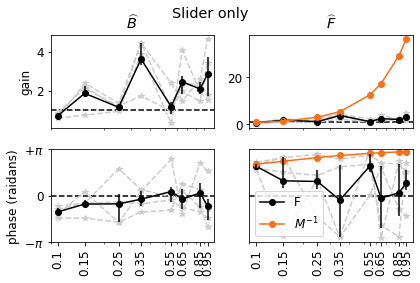

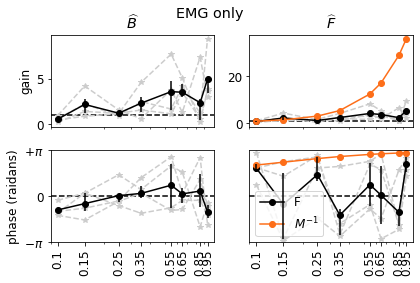

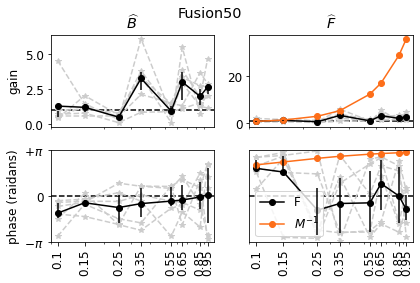

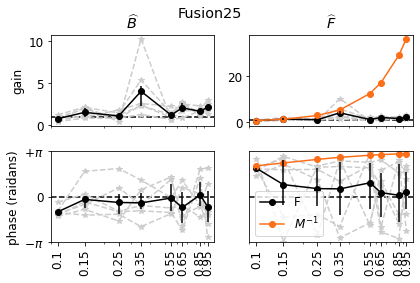

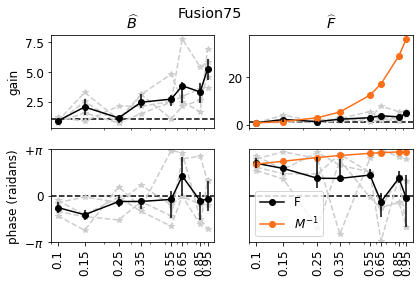

In [176]:
#plot F & B (Fig 8)
Plot_F_B(F_slider, B_slider,'Slider only',trialnum[0])
Plot_F_B(F_emg, B_emg,'EMG only',trialnum[1])
Plot_F_B(F_fusion50, B_fusion50,'Fusion50',trialnum[2])
Plot_F_B(F_fusion25, B_fusion25,'Fusion25',trialnum[3])
Plot_F_B(F_fusion75, B_fusion75,'Fusion75',trialnum[4])

## F0 & B0

In [177]:
#calculate F & B (Fig 8)
F_slider,B_slider = F_B(TU0R['condition0'],TU0D['condition0'],trialnum[0])
F_emg,B_emg = F_B(TU0R['condition1'],TU0D['condition1'],trialnum[1])
F_fusion50,B_fusion50 = F_B(TU0R['condition2'],TU0D['condition2'],trialnum[2])
F_fusion25,B_fusion25 = F_B(TU0R['condition3'],TU0D['condition3'],trialnum[3])
F_fusion75,B_fusion75 = F_B(TU0R['condition4'],TU0D['condition4'],trialnum[4])
F_slider2,B_slider2 = F_B(TU0R['condition5'],TU0D['condition5'],trialnum[5])
F_emg2,B_emg2 = F_B(TU0R['condition6'],TU0D['condition6'],trialnum[6])

#create dict
F0 = { 'condition0': F_slider, 
      'condition1': F_emg,
      'condition2': F_fusion50,
      'condition3': F_fusion25,
      'condition4': F_fusion75,
      'condition5': F_slider2, 
      'condition6': F_emg2}
B0 = { 'condition0': B_slider, 
      'condition1': B_emg,
      'condition2': B_fusion50,
      'condition3': B_fusion25,
      'condition4': B_fusion75,
      'condition5': B_slider2, 
      'condition6': B_emg2}

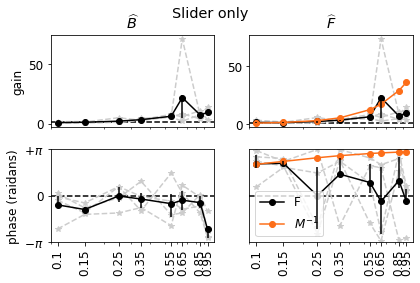

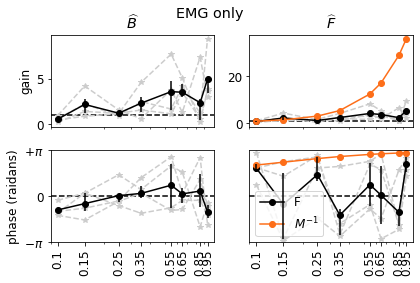

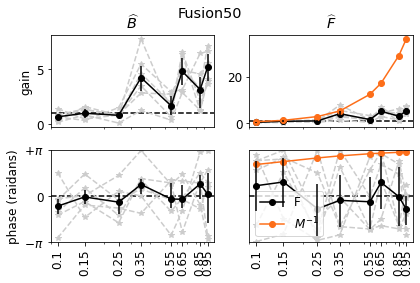

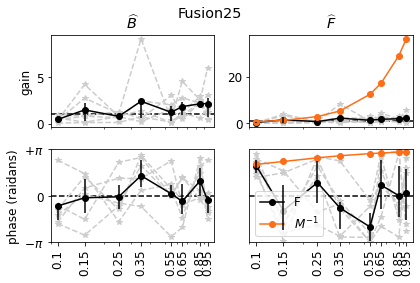

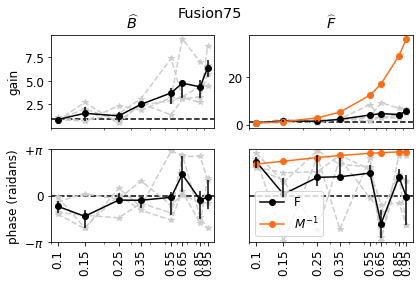

In [178]:
#plot F & B (Fig 8)
Plot_F_B(F_slider, B_slider,'Slider only',trialnum[0])
Plot_F_B(F_emg, B_emg,'EMG only',trialnum[1])
Plot_F_B(F_fusion50, B_fusion50,'Fusion50',trialnum[2])
Plot_F_B(F_fusion25, B_fusion25,'Fusion25',trialnum[3])
Plot_F_B(F_fusion75, B_fusion75,'Fusion75',trialnum[4])

## F1 & B1

In [179]:
#calculate F & B (Fig 8)
F_slider,B_slider = F_B(TU1R['condition0'],TU1D['condition0'],trialnum[0])
F_emg,B_emg = F_B(TU1R['condition1'],TU1D['condition1'],trialnum[1])
F_fusion50,B_fusion50 = F_B(TU1R['condition2'],TU1D['condition2'],trialnum[2])
F_fusion25,B_fusion25 = F_B(TU1R['condition3'],TU1D['condition3'],trialnum[3])
F_fusion75,B_fusion75 = F_B(TU1R['condition4'],TU1D['condition4'],trialnum[4])
F_slider2,B_slider2 = F_B(TU1R['condition5'],TU1D['condition5'],trialnum[5])
F_emg2,B_emg2 = F_B(TU1R['condition6'],TU1D['condition6'],trialnum[6])

#create dict
F1 = { 'condition0': F_slider, 
      'condition1': F_emg,
      'condition2': F_fusion50,
      'condition3': F_fusion25,
      'condition4': F_fusion75,
      'condition5': F_slider2, 
      'condition6': F_emg2}
B1 = { 'condition0': B_slider, 
      'condition1': B_emg,
      'condition2': B_fusion50,
      'condition3': B_fusion25,
      'condition4': B_fusion75,
      'condition5': B_slider2, 
      'condition6': B_emg2}

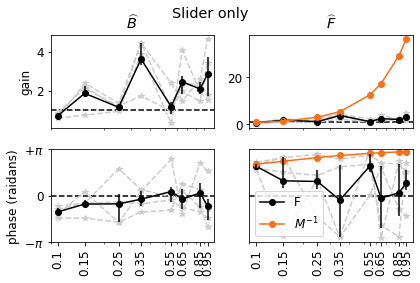

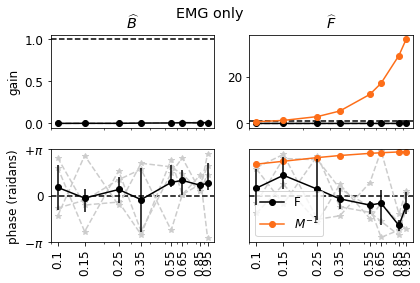

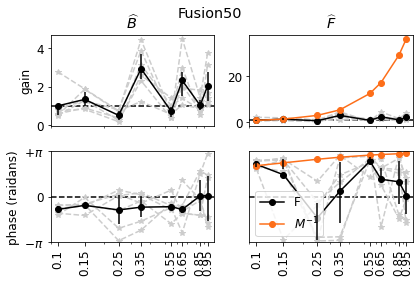

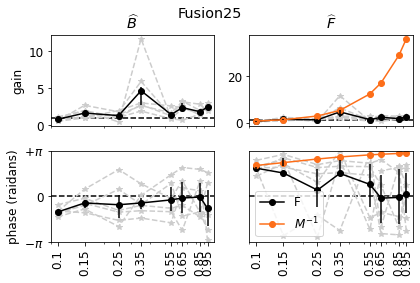

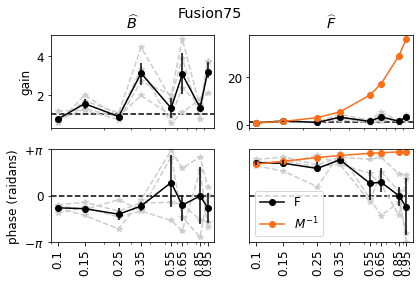

In [180]:
#plot F & B (Fig 8)
Plot_F_B(F_slider, B_slider,'Slider only',trialnum[0])
Plot_F_B(F_emg, B_emg,'EMG only',trialnum[1])
Plot_F_B(F_fusion50, B_fusion50,'Fusion50',trialnum[2])
Plot_F_B(F_fusion25, B_fusion25,'Fusion25',trialnum[3])
Plot_F_B(F_fusion75, B_fusion75,'Fusion75',trialnum[4])

## F & B of indivisul inputs

In [181]:
# #if want to look at individual inputs (EMG in fusion and slider in fusion):
# TUR_fusion = { 'fusion': Tur_fusion, 
#                 'fusion_emg': Tur_fusion_emg,
#                 'fusion_slider': Tur_fusion_slider}
# TUD_fusion = { 'fusion': Tud_fusion, 
#                 'fusion_emg': Tud_fusion_emg,
#                 'fusion_slider': Tud_fusion_slider}

In [182]:
# #calculate F & B (Fig 8)
# F_slider,B_slider = F_B(TUR['condition0'],TUD['condition0'])
# F_emg,B_emg = F_B(TUR['condition1'],TUD['condition1'])
# F_fusion,B_fusion = F_B(TUR['condition2'],TUD['condition2'])
# F_fusion_emg,B_fusion_emg = F_B(TUR_fusion['fusion_emg'],TUD_fusion['fusion_emg'])
# F_fusion_slider,B_fusion_slider = F_B(TUR_fusion['fusion_slider'],TUD_fusion['fusion_slider'])

# #create dict
# F = { 'condition0': F_slider, 
#       'condition1': F_emg,
#       'condition2': F_fusion,
#       'fusion_emg': F_fusion_emg,
#       'fusion_slider': F_fusion_slider}
# B = { 'condition0': B_slider, 
#       'condition1': B_emg,
#       'condition2': B_fusion,
#       'fusion_emg': B_fusion_emg,
#       'fusion_slider': B_fusion_slider}

In [183]:
# #plot F & B (Fig 8)
# Plot_F_B(F_slider, B_slider,'Slider only')
# Plot_F_B(F_emg, B_emg,'EMG only')
# Plot_F_B(F_fusion, B_fusion,'Fusion')
# Plot_F_B(F_fusion_emg, B_fusion_emg,'EMG in Fusion')
# Plot_F_B(F_fusion_slider, B_fusion_slider,'Slider in Fusion')

# MSE

## MSE freq

In [184]:
MSE = {} #MSEfreq at each freq, |M^{-1} - F|^2
MSEf = {} #MSEfreq, Sum|M^{-1} - F|^2
for k in range(num_cond): #for each condition
  MSE['condition'+str(k)] = np.zeros((math.ceil(trialnum[k]/2),8))
  MSEf['condition'+str(k)] = np.zeros((math.ceil(trialnum[k]/2)))
  for i in range(math.ceil(trialnum[k]/2)):
    MSE['condition'+str(k)][i] = np.abs((1/ M_h[sitimulated_index]) - F['condition'+str(k)][i])**2
  MSEf['condition'+str(k)] = np.sum(MSE['condition'+str(k)],axis=1)

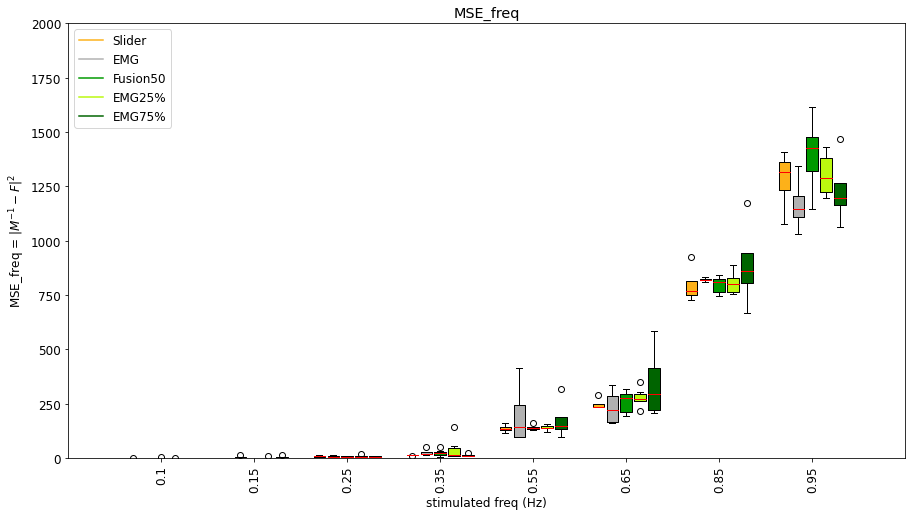

In [185]:
# box plots
fig,ax = plt.subplots(1, 1,sharex=True,sharey=True,figsize=(15,8)) 
stim = np.array([1,2,3,4,5,6,7,8]) #number of stimulated freq = 8
pos_slider = stim - 0.3
pos_emg = stim - 0.15
pos_fusion50 = stim 
pos_fusion25 = stim + 0.15
pos_fusion75 = stim + 0.3

MSE_slider = [MSE['condition0'][:,i] for i in range(8)] 
MSE_emg = [MSE['condition1'][:,i] for i in range(8)]
MSE_fusion50 = [MSE['condition2'][:,i] for i in range(8)]
MSE_fusion25 = [MSE['condition3'][:,i] for i in range(8)]
MSE_fusion75 = [MSE['condition4'][:,i] for i in range(8)]
bp0 = ax.boxplot([MSE_slider[i] for i in range(8)], positions = pos_slider, widths = 0.125)
bp1 = ax.boxplot([MSE_emg[i] for i in range(8)], positions = pos_emg, widths = 0.125)
bp2 = ax.boxplot([MSE_fusion50[i] for i in range(8)], positions = pos_fusion50, widths = 0.125)
bp3 = ax.boxplot([MSE_fusion25[i] for i in range(8)], positions = pos_fusion25, widths = 0.125)
bp4 = ax.boxplot([MSE_fusion75[i] for i in range(8)], positions = pos_fusion75, widths = 0.125)

# fill in colors
for i in range(5):
  if i == 0: bp = bp0; box_colors = colors['r']
  elif i == 1: bp = bp1; box_colors = colors['g']
  elif i == 2: bp = bp2; box_colors = colors['u']
  elif i == 3: bp = bp3; box_colors = colors['u25']
  else: bp = bp4; box_colors = colors['u75']
  num_boxes = 8
  medians = np.empty(num_boxes)
  for i in range(num_boxes):
      box = bp['boxes'][i]
      box_x = []
      box_y = []
      for j in range(5):
          box_x.append(box.get_xdata()[j])
          box_y.append(box.get_ydata()[j])
      box_coords = np.column_stack([box_x, box_y])
      ax.add_patch(Polygon(box_coords, facecolor=box_colors))
  # change color of medians
  for median in bp['medians']: median.set(color ='red')

# make labels
xticks = prime*0.05
xticklabels =np.round(prime*0.05,2)
ax.set_xlim(0,9)
ax.set_xticks(stim)
ax.set_xticklabels(xticklabels,rotation=90)
ax.set_xlabel('stimulated freq (Hz)')
ax.set_ylabel(r'MSE_freq = $|M^{-1} - F|^{2}$')
ax.title.set_text('MSE_freq')

# draw temporary lines and use them to create a legend
hr, = plt.plot([1,1],color = colors['r'])
hg, = plt.plot([1,1],color = colors['g'])
hu50, = plt.plot([1,1],color = colors['u'])
hu25, = plt.plot([1,1],color = colors['u25'])
hu75, = plt.plot([1,1],color = colors['u75'])
plt.legend((hr, hg, hu50, hu25, hu75),('Slider', 'EMG', 'Fusion50', 'EMG25%', 'EMG75%'), loc= 'upper left')
hr.set_visible(False)
hg.set_visible(False)
hu50.set_visible(False)
hu25.set_visible(False)
hu75.set_visible(False)

plt.ylim(0,2000)
plt.show();

## MSE_time vs. MSE_freq

In [186]:
#calculate MSEtime = Sum|r - y|^2
MSEt = {}
for k in range(num_cond): #for each condition
  MSEt['condition'+str(k)] = np.zeros((trialnum[k]))
  for i in range(trialnum[k]):
    MSEt['condition'+str(k)][i] = np.sum(np.abs(TIME['condition'+str(k)]['r'][i] - TIME['condition'+str(k)]['y'][i])**2)

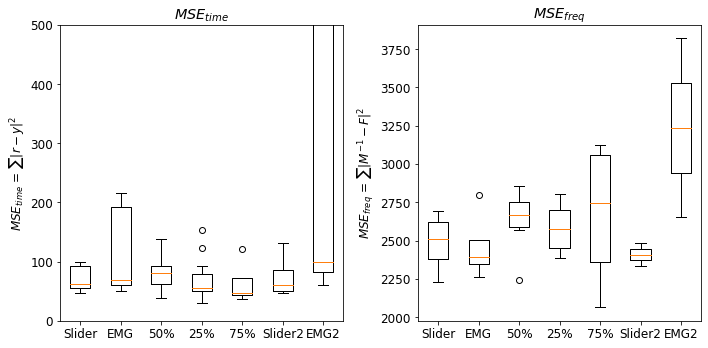

In [187]:
# box plots for MSEtime

def boxplot_colors(bp0,bp1,bp2,bp3,bp4,bp5,bp6): # fill in colors
  for i in range(num_cond):
    if i == 0: bp = bp0; box_colors = colors['r']
    elif i == 1: bp = bp1; box_colors = colors['g']
    elif i == 2: bp = bp2; box_colors = colors['u']
    elif i == 3: bp = bp3; box_colors = colors['u25']
    elif i == 4: bp = bp4; box_colors = colors['u75']
    elif i == 5: bp = bp5; box_colors = colors['r']
    else: bp = bp6; box_colors = colors['g']
    num_boxes = 1
    medians = np.empty(num_boxes)
    for i in range(num_boxes):
        box = bp['boxes'][i]
        box_x = []
        box_y = []
        for j in range(num_cond):
            box_x.append(box.get_xdata()[j])
            box_y.append(box.get_ydata()[j])
        box_coords = np.column_stack([box_x, box_y])
        ax.add_patch(Polygon(box_coords, facecolor=box_colors))
    # change color of medians
    for median in bp['medians']: median.set(color ='red')

fig,axs = plt.subplots(1, 2,figsize=(10,5)) 
pos = np.array([1,2,3,4,5,6,7])
xticks = pos
xticklabels = ['Slider','EMG','50%','25%','75%','Slider2','EMG2']

#MSE_time
ax = axs[0]
bp0 = ax.boxplot(MSEt['condition0'], positions = [pos[0]], widths = 0.5)
bp1 = ax.boxplot(MSEt['condition1'], positions = [pos[1]], widths = 0.5)
bp2 = ax.boxplot(MSEt['condition2'], positions = [pos[2]], widths = 0.5)
bp3 = ax.boxplot(MSEt['condition3'], positions = [pos[3]], widths = 0.5)
bp4 = ax.boxplot(MSEt['condition4'], positions = [pos[4]], widths = 0.5)
bp5 = ax.boxplot(MSEt['condition5'], positions = [pos[5]], widths = 0.5)
bp6 = ax.boxplot(MSEt['condition6'], positions = [pos[6]], widths = 0.5)

# boxplot_colors(bp0,bp1,bp2,bp3,bp4,bp5,bp6)
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_ylabel(r'$MSE_{time}$ = $\sum |r-y|^{2}$')
ax.title.set_text(r'$MSE_{time}$')
ax.set_ylim(0,500)

#MSE_freq
ax = axs[1]
bp0 = ax.boxplot(MSEf['condition0'], positions = [pos[0]], widths = 0.5)
bp1 = ax.boxplot(MSEf['condition1'], positions = [pos[1]], widths = 0.5)
bp2 = ax.boxplot(MSEf['condition2'], positions = [pos[2]], widths = 0.5)
bp3 = ax.boxplot(MSEf['condition3'], positions = [pos[3]], widths = 0.5)
bp4 = ax.boxplot(MSEf['condition4'], positions = [pos[4]], widths = 0.5)
bp5 = ax.boxplot(MSEf['condition5'], positions = [pos[5]], widths = 0.5)
bp6 = ax.boxplot(MSEf['condition6'], positions = [pos[6]], widths = 0.5)

# boxplot_colors(bp0,bp1,bp2,bp3,bp4,bp5,bp6)
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_ylabel(r'$MSE_{freq}$ = $\sum |M^{-1} - F|^{2}$')
ax.title.set_text(r'$MSE_{freq}$')
# ax.set_ylim(0,5000)

plt.tight_layout();
plt.show();

## MSE freq wrt individual signals


In [188]:
MSEF0 = {} #MSEfreq at each freq, |M^{-1} - F|^2
MSEfF0 = {} #MSEfreq, Sum|M^{-1} - F|^2
for k in range(num_cond): #for each condition
  MSEF0['condition'+str(k)] = np.zeros((math.ceil(trialnum[k]/2),8))
  MSEfF0['condition'+str(k)] = np.zeros((math.ceil(trialnum[k]/2)))
  for i in range(math.ceil(trialnum[k]/2)):
    MSEF0['condition'+str(k)][i] = np.abs((1/ M_h[sitimulated_index]) - F0['condition'+str(k)][i])**2
  MSEfF0['condition'+str(k)] = np.sum(MSEF0['condition'+str(k)],axis=1)

MSEF1 = {} #MSEfreq at each freq, |M^{-1} - F|^2
MSEfF1 = {} #MSEfreq, Sum|M^{-1} - F|^2
for k in range(num_cond): #for each condition
  MSEF1['condition'+str(k)] = np.zeros((math.ceil(trialnum[k]/2),8))
  MSEfF1['condition'+str(k)] = np.zeros((math.ceil(trialnum[k]/2)))
  for i in range(math.ceil(trialnum[k]/2)):
    MSEF1['condition'+str(k)][i] = np.abs((1/ M_h[sitimulated_index]) - F1['condition'+str(k)][i])**2
  MSEfF1['condition'+str(k)] = np.sum(MSEF1['condition'+str(k)],axis=1)

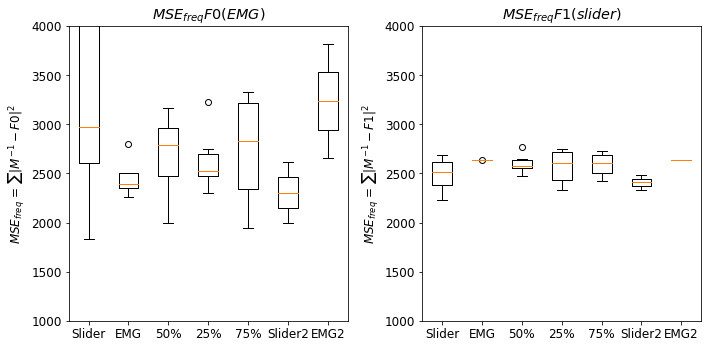

In [189]:
# box plots for MSEtime

def boxplot_colors(bp0,bp1,bp2,bp3,bp4,bp5,bp6): # fill in colors
  for i in range(num_cond):
    if i == 0: bp = bp0; box_colors = colors['r']
    elif i == 1: bp = bp1; box_colors = colors['g']
    elif i == 2: bp = bp2; box_colors = colors['u']
    elif i == 3: bp = bp3; box_colors = colors['u25']
    elif i == 4: bp = bp4; box_colors = colors['u75']
    elif i == 5: bp = bp5; box_colors = colors['r']
    else: bp = bp6; box_colors = colors['g']
    num_boxes = 1
    medians = np.empty(num_boxes)
    for i in range(num_boxes):
        box = bp['boxes'][i]
        box_x = []
        box_y = []
        for j in range(num_cond):
            box_x.append(box.get_xdata()[j])
            box_y.append(box.get_ydata()[j])
        box_coords = np.column_stack([box_x, box_y])
        ax.add_patch(Polygon(box_coords, facecolor=box_colors))
    # change color of medians
    for median in bp['medians']: median.set(color ='red')

fig,axs = plt.subplots(1, 2,figsize=(10,5)) 
pos = np.array([1,2,3,4,5,6,7])
xticks = pos
xticklabels = ['Slider','EMG','50%','25%','75%','Slider2','EMG2']

#MSE_time
ax = axs[0]
bp0 = ax.boxplot(MSEfF0['condition0'], positions = [pos[0]], widths = 0.5)
bp1 = ax.boxplot(MSEfF0['condition1'], positions = [pos[1]], widths = 0.5)
bp2 = ax.boxplot(MSEfF0['condition2'], positions = [pos[2]], widths = 0.5)
bp3 = ax.boxplot(MSEfF0['condition3'], positions = [pos[3]], widths = 0.5)
bp4 = ax.boxplot(MSEfF0['condition4'], positions = [pos[4]], widths = 0.5)
bp5 = ax.boxplot(MSEfF0['condition5'], positions = [pos[5]], widths = 0.5)
bp6 = ax.boxplot(MSEfF0['condition6'], positions = [pos[6]], widths = 0.5)

# boxplot_colors(bp0,bp1,bp2,bp3,bp4,bp5,bp6)
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_ylabel(r'$MSE_{freq}$ = $\sum |M^{-1} - F0|^{2}$')
ax.title.set_text(r'$MSE_{freq} F0 (EMG)$')
ax.set_ylim(1000,4000)


#MSE_freq
ax = axs[1]
bp0 = ax.boxplot(MSEfF1['condition0'], positions = [pos[0]], widths = 0.5)
bp1 = ax.boxplot(MSEfF1['condition1'], positions = [pos[1]], widths = 0.5)
bp2 = ax.boxplot(MSEfF1['condition2'], positions = [pos[2]], widths = 0.5)
bp3 = ax.boxplot(MSEfF1['condition3'], positions = [pos[3]], widths = 0.5)
bp4 = ax.boxplot(MSEfF1['condition4'], positions = [pos[4]], widths = 0.5)
bp5 = ax.boxplot(MSEfF1['condition5'], positions = [pos[5]], widths = 0.5)
bp6 = ax.boxplot(MSEfF1['condition6'], positions = [pos[6]], widths = 0.5)

# boxplot_colors(bp0,bp1,bp2,bp3,bp4,bp5,bp6)
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_ylabel(r'$MSE_{freq}$ = $\sum |M^{-1} - F1|^{2}$')
ax.title.set_text(r'$MSE_{freq} F1 (slider)$')
ax.set_ylim(1000,4000)

plt.tight_layout();
plt.show();

In [190]:
Minvsum = np.sum(np.abs(1/ M_h[sitimulated_index])**2)
Minvsum

2635.623935903519

## MSE freq of first 2 freq

In [191]:
sitimulated_index

array([ 4,  6, 10, 14, 22, 26, 34, 38])

In [192]:
sitimulated_index_2 = [4,6] # first two stimulated freqs
MSE2 = {} #MSEfreq at each freq, |M^{-1} - F|^2
MSEf2 = {} #MSEfreq, Sum|M^{-1} - F|^2
for k in range(num_cond): #for each condition
  MSE2['condition'+str(k)] = np.zeros((math.ceil(trialnum[k]/2),2))
  MSEf2['condition'+str(k)] = np.zeros((math.ceil(trialnum[k]/2)))
  for i in range(math.ceil(trialnum[k]/2)):
    MSE2['condition'+str(k)][i] = np.abs((1/ M_h[sitimulated_index_2]) - F['condition'+str(k)][i][:2])**2
  MSEf2['condition'+str(k)] = np.sum(MSE2['condition'+str(k)],axis=1)

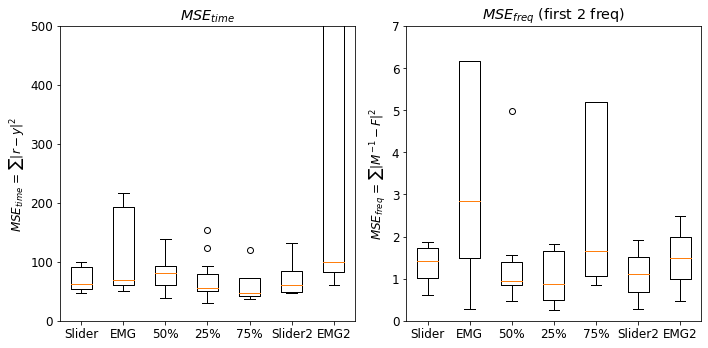

In [193]:
# box plots for MSEtime

def boxplot_colors(bp0,bp1,bp2,bp3,bp4,bp5,bp6): # fill in colors
  for i in range(num_cond):
    if i == 0: bp = bp0; box_colors = colors['r']
    elif i == 1: bp = bp1; box_colors = colors['g']
    elif i == 2: bp = bp2; box_colors = colors['u']
    elif i == 3: bp = bp3; box_colors = colors['u25']
    elif i == 4: bp = bp4; box_colors = colors['u75']
    elif i == 5: bp = bp5; box_colors = colors['r']
    else: bp = bp6; box_colors = colors['g']
    num_boxes = 1
    medians = np.empty(num_boxes)
    for i in range(num_boxes):
        box = bp['boxes'][i]
        box_x = []
        box_y = []
        for j in range(num_cond):
            box_x.append(box.get_xdata()[j])
            box_y.append(box.get_ydata()[j])
        box_coords = np.column_stack([box_x, box_y])
        ax.add_patch(Polygon(box_coords, facecolor=box_colors))
    # change color of medians
    for median in bp['medians']: median.set(color ='red')

fig,axs = plt.subplots(1, 2,figsize=(10,5)) 
pos = np.array([1,2,3,4,5,6,7])
xticks = pos
xticklabels = ['Slider','EMG','50%','25%','75%','Slider2','EMG2']

#MSE_time
ax = axs[0]
bp0 = ax.boxplot(MSEt['condition0'], positions = [pos[0]], widths = 0.5)
bp1 = ax.boxplot(MSEt['condition1'], positions = [pos[1]], widths = 0.5)
bp2 = ax.boxplot(MSEt['condition2'], positions = [pos[2]], widths = 0.5)
bp3 = ax.boxplot(MSEt['condition3'], positions = [pos[3]], widths = 0.5)
bp4 = ax.boxplot(MSEt['condition4'], positions = [pos[4]], widths = 0.5)
bp5 = ax.boxplot(MSEt['condition5'], positions = [pos[5]], widths = 0.5)
bp6 = ax.boxplot(MSEt['condition6'], positions = [pos[6]], widths = 0.5)

# boxplot_colors(bp0,bp1,bp2,bp3,bp4,bp5,bp6)
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_ylabel(r'$MSE_{time}$ = $\sum |r-y|^{2}$')
ax.title.set_text(r'$MSE_{time}$')
ax.set_ylim(0,500)


#MSE_freq
ax = axs[1]
bp0 = ax.boxplot(MSEf2['condition0'], positions = [pos[0]], widths = 0.5)
bp1 = ax.boxplot(MSEf2['condition1'], positions = [pos[1]], widths = 0.5)
bp2 = ax.boxplot(MSEf2['condition2'], positions = [pos[2]], widths = 0.5)
bp3 = ax.boxplot(MSEf2['condition3'], positions = [pos[3]], widths = 0.5)
bp4 = ax.boxplot(MSEf2['condition4'], positions = [pos[4]], widths = 0.5)
bp5 = ax.boxplot(MSEf2['condition5'], positions = [pos[5]], widths = 0.5)
bp6 = ax.boxplot(MSEf2['condition6'], positions = [pos[6]], widths = 0.5)

# boxplot_colors(bp0,bp1,bp2,bp3,bp4,bp5,bp6)
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_ylabel(r'$MSE_{freq}$ = $\sum |M^{-1} - F|^{2}$')
ax.title.set_text(r'$MSE_{freq}$ (first 2 freq)')
ax.set_ylim(0,7)

plt.tight_layout();
plt.show();

# User input U

## User input at the stimulated freqs 

In [194]:
trialnum

[8, 8, 12, 12, 8, 4, 4]

In [195]:
# U at the stimulated freqs
U_stim = {}
U_stim_norm = {}
for k in range(num_cond): #for each condition
    U_stim['condition'+str(k)] = np.zeros((trialnum[k],8))
    U_stim_norm['condition'+str(k)] = np.zeros((trialnum[k]))
    for i in range(trialnum[k]):
        U_stim['condition'+str(k)][i] = np.abs(FREQ['condition'+str(k)]['U'][i][sitimulated_index])**2
    U_stim_norm['condition'+str(k)] = np.sum(U_stim['condition'+str(k)],axis=1)


In [196]:
# U at the first two stimulated freqs
U_stim2 = {}
U_stim2_norm = {}
for k in range(num_cond): #for each condition
    U_stim2['condition'+str(k)] = np.zeros((trialnum[k],2))
    U_stim2_norm['condition'+str(k)] = np.zeros((trialnum[k]))
    for i in range(trialnum[k]):
        U_stim2['condition'+str(k)][i] = np.abs(FREQ['condition'+str(k)]['U'][i][sitimulated_index_2])**2
    U_stim2_norm['condition'+str(k)] = np.sum(U_stim2['condition'+str(k)],axis=1)

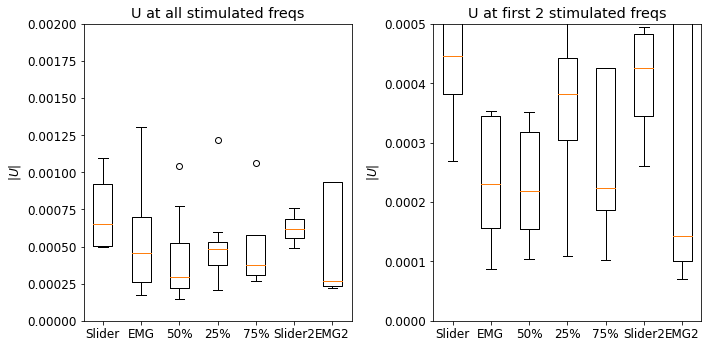

In [197]:
# box plots for MSEtime

def boxplot_colors(bp0,bp1,bp2,bp3,bp4,bp5,bp6): # fill in colors
  for i in range(num_cond):
    if i == 0: bp = bp0; box_colors = colors['r']
    elif i == 1: bp = bp1; box_colors = colors['g']
    elif i == 2: bp = bp2; box_colors = colors['u']
    elif i == 3: bp = bp3; box_colors = colors['u25']
    elif i == 4: bp = bp4; box_colors = colors['u75']
    elif i == 5: bp = bp5; box_colors = colors['r']
    else: bp = bp6; box_colors = colors['g']
    num_boxes = 1
    medians = np.empty(num_boxes)
    for i in range(num_boxes):
        box = bp['boxes'][i]
        box_x = []
        box_y = []
        for j in range(num_cond):
            box_x.append(box.get_xdata()[j])
            box_y.append(box.get_ydata()[j])
        box_coords = np.column_stack([box_x, box_y])
        ax.add_patch(Polygon(box_coords, facecolor=box_colors))
    # change color of medians
    for median in bp['medians']: median.set(color ='red')

fig,axs = plt.subplots(1, 2,figsize=(10,5)) 
pos = np.array([1,2,3,4,5,6,7])
xticks = pos
xticklabels = ['Slider','EMG','50%','25%','75%','Slider2','EMG2']

#MSE_time
ax = axs[0]
bp0 = ax.boxplot(U_stim_norm['condition0'], positions = [pos[0]], widths = 0.5)
bp1 = ax.boxplot(U_stim_norm['condition1'], positions = [pos[1]], widths = 0.5)
bp2 = ax.boxplot(U_stim_norm['condition2'], positions = [pos[2]], widths = 0.5)
bp3 = ax.boxplot(U_stim_norm['condition3'], positions = [pos[3]], widths = 0.5)
bp4 = ax.boxplot(U_stim_norm['condition4'], positions = [pos[4]], widths = 0.5)
bp5 = ax.boxplot(U_stim_norm['condition5'], positions = [pos[5]], widths = 0.5)
bp6 = ax.boxplot(U_stim_norm['condition6'], positions = [pos[6]], widths = 0.5)

# boxplot_colors(bp0,bp1,bp2,bp3,bp4,bp5,bp6)
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_ylabel(r'$|U|$')
ax.title.set_text(r'U at all stimulated freqs')
ax.set_ylim(0,0.002)


#MSE_freq
ax = axs[1]
bp0 = ax.boxplot(U_stim2_norm['condition0'], positions = [pos[0]], widths = 0.5)
bp1 = ax.boxplot(U_stim2_norm['condition1'], positions = [pos[1]], widths = 0.5)
bp2 = ax.boxplot(U_stim2_norm['condition2'], positions = [pos[2]], widths = 0.5)
bp3 = ax.boxplot(U_stim2_norm['condition3'], positions = [pos[3]], widths = 0.5)
bp4 = ax.boxplot(U_stim2_norm['condition4'], positions = [pos[4]], widths = 0.5)
bp5 = ax.boxplot(U_stim2_norm['condition5'], positions = [pos[5]], widths = 0.5)
bp6 = ax.boxplot(U_stim2_norm['condition6'], positions = [pos[6]], widths = 0.5)

# boxplot_colors(bp0,bp1,bp2,bp3,bp4,bp5,bp6)
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_ylabel(r'$|U|$')
ax.title.set_text(r'U at first 2 stimulated freqs')
ax.set_ylim(0,0.0005)

plt.tight_layout();
plt.show();

## At non-stim freq


In [198]:
# U at the stimulated freqs
U_non = {}
U_nonstim_norm = {}
for k in range(num_cond): #for each condition
    U_non['condition'+str(k)] = copy.deepcopy(FREQ['condition'+str(k)]['U'])
    U_nonstim_norm['condition'+str(k)] = np.zeros((trialnum[k]))
    for i in range(trialnum[k]):
        U_non['condition'+str(k)][i][sitimulated_index] = 0
        U_nonstim_norm['condition'+str(k)][i] = np.sum(np.abs(U_non['condition'+str(k)][i])**2)   


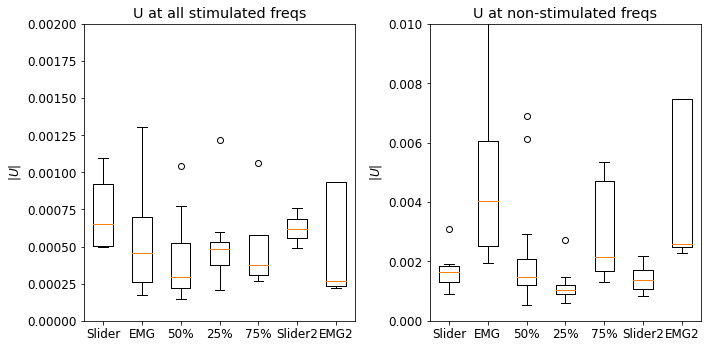

In [199]:
# box plots for MSEtime

def boxplot_colors(bp0,bp1,bp2,bp3,bp4,bp5,bp6): # fill in colors
  for i in range(num_cond):
    if i == 0: bp = bp0; box_colors = colors['r']
    elif i == 1: bp = bp1; box_colors = colors['g']
    elif i == 2: bp = bp2; box_colors = colors['u']
    elif i == 3: bp = bp3; box_colors = colors['u25']
    elif i == 4: bp = bp4; box_colors = colors['u75']
    elif i == 5: bp = bp5; box_colors = colors['r']
    else: bp = bp6; box_colors = colors['g']
    num_boxes = 1
    medians = np.empty(num_boxes)
    for i in range(num_boxes):
        box = bp['boxes'][i]
        box_x = []
        box_y = []
        for j in range(num_cond):
            box_x.append(box.get_xdata()[j])
            box_y.append(box.get_ydata()[j])
        box_coords = np.column_stack([box_x, box_y])
        ax.add_patch(Polygon(box_coords, facecolor=box_colors))
    # change color of medians
    for median in bp['medians']: median.set(color ='red')

fig,axs = plt.subplots(1, 2,figsize=(10,5)) 
pos = np.array([1,2,3,4,5,6,7])
xticks = pos
xticklabels = ['Slider','EMG','50%','25%','75%','Slider2','EMG2']

#MSE_time
ax = axs[0]
bp0 = ax.boxplot(U_stim_norm['condition0'], positions = [pos[0]], widths = 0.5)
bp1 = ax.boxplot(U_stim_norm['condition1'], positions = [pos[1]], widths = 0.5)
bp2 = ax.boxplot(U_stim_norm['condition2'], positions = [pos[2]], widths = 0.5)
bp3 = ax.boxplot(U_stim_norm['condition3'], positions = [pos[3]], widths = 0.5)
bp4 = ax.boxplot(U_stim_norm['condition4'], positions = [pos[4]], widths = 0.5)
bp5 = ax.boxplot(U_stim_norm['condition5'], positions = [pos[5]], widths = 0.5)
bp6 = ax.boxplot(U_stim_norm['condition6'], positions = [pos[6]], widths = 0.5)

# boxplot_colors(bp0,bp1,bp2,bp3,bp4,bp5,bp6)
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_ylabel(r'$|U|$')
ax.title.set_text(r'U at all stimulated freqs')
ax.set_ylim(0,0.002)


#MSE_freq
ax = axs[1]
bp0 = ax.boxplot(U_nonstim_norm['condition0'], positions = [pos[0]], widths = 0.5)
bp1 = ax.boxplot(U_nonstim_norm['condition1'], positions = [pos[1]], widths = 0.5)
bp2 = ax.boxplot(U_nonstim_norm['condition2'], positions = [pos[2]], widths = 0.5)
bp3 = ax.boxplot(U_nonstim_norm['condition3'], positions = [pos[3]], widths = 0.5)
bp4 = ax.boxplot(U_nonstim_norm['condition4'], positions = [pos[4]], widths = 0.5)
bp5 = ax.boxplot(U_nonstim_norm['condition5'], positions = [pos[5]], widths = 0.5)
bp6 = ax.boxplot(U_nonstim_norm['condition6'], positions = [pos[6]], widths = 0.5)

# boxplot_colors(bp0,bp1,bp2,bp3,bp4,bp5,bp6)
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_ylabel(r'$|U|$')
ax.title.set_text(r'U at non-stimulated freqs')
ax.set_ylim(0,0.01)

plt.tight_layout();
plt.show();
    


## At non stimulated freqs - Effect of sensorimotor noise 

In [200]:
#find U at non-stimulated freq:
#U0: slider only; U1: EMG only; U2: Fusion; 
#U2_emg: EMG input in Fusion; U2_slider: slider input in Fusion

def non_stimulated_U(U0, U1, U2, U2_emg, U2_slider):
  U0_non = copy.deepcopy(U0)
  U1_non = copy.deepcopy(U1)
  U2_non = copy.deepcopy(U2)
  U2_emg_non = copy.deepcopy(U2_emg)
  U2_slider_non = copy.deepcopy(U2_slider)

  #replace stimulated U as nan
  for i in range(trialnum[0]):
    U0_non[i][sitimulated_index] = np.nan
  for i in range(trialnum[1]):
    U1_non[i][sitimulated_index] = np.nan
  for i in range(trialnum[2]):
    U2_non[i][sitimulated_index] = np.nan
  for i in range(trialnum[3]):
    U2_emg_non[i][sitimulated_index] = np.nan
  for i in range(trialnum[4]):
    U2_slider_non[i][sitimulated_index] = np.nan
    
  #create a dict for non-stimulated U
  U_nonstim = { 'condition0': U0_non, 
                'condition1': U1_non,
                'condition2': U2_non,
                'EMG_fusion': U2_emg_non,
                'slider_fusion': U2_slider_non
                }
  return U_nonstim

In [201]:
def Plot_U_nonstim(U_nonstim):
  #find mask (to avoid broken lines in plots for nan)
  mask = np.isfinite(U_nonstim['condition0'][0])[:N//2]

  # mag plots
  fig,axs = plt.subplots(2, 2,sharex=True,figsize=(10,7))
  xlim = (0.025, 1.0)
  xticks = np.array([.025,.05,.1,.25,.5,1.])
  ylim = (1e-4,1e-1)
  # yticks = [1e-2,0.1,1]
  # ytickslabels = [0.01,0.10,1.00]
  ylimphase = (-np.pi,np.pi)
  yticksphase = [-np.pi,0.,np.pi]
  yticklabelsphase = [r'$-\pi$',r'0',r'$+\pi$']
  Colors = [colors['r'],colors['g'],colors['u'],colors['g'],colors['r']]
  FillColors = [rfill,gfill,ufill,gfill,rfill]
  Labels = ['u in slider only','u in EMG only','u in Fusion','u_EMG','u_slider']
  U_mag_mean = []; U_mag_75 = []; U_mag_25 = []
  U_phase_mean = []; U_phase_75 = []; U_phase_25 = []

  for i in range(5): # for each condition (0, 1, 2) & (U0 emg in fusion, U1 slider in fusion)
    #mag, mean and percentile of u_nonstim
    if i < 3: 
      U_mag = np.abs(U_nonstim['condition'+str(i)])
      U_phase = np.arctan2(np.imag(U_nonstim['condition'+str(i)]),np.real(U_nonstim['condition'+str(i)]))
    elif i == 3:
      U_mag = np.abs(U_nonstim['EMG_fusion'])
      U_phase = np.arctan2(np.imag(U_nonstim['EMG_fusion']),np.real(U_nonstim['EMG_fusion']))
    else: #i=4
      U_mag = np.abs(U_nonstim['slider_fusion'])
      U_phase = np.arctan2(np.imag(U_nonstim['slider_fusion']),np.real(U_nonstim['slider_fusion']))
    U_mag_mean.append( np.mean(U_mag,axis=0)[:N//2] )
    U_mag_75.append( np.percentile(U_mag, 75, axis=0)[:N//2] )
    U_mag_25.append( np.percentile(U_mag, 25, axis=0)[:N//2] )
    U_phase_mean.append( np.mean(U_phase,axis=0)[:N//2] )
    U_phase_75.append( np.percentile(U_phase, 75, axis=0)[:N//2] )
    U_phase_25.append( np.percentile(U_phase, 25, axis=0)[:N//2] )

    #plot non stimulated freq, Fusion is plotted in both subplots
    if i < 3: #0,1,2
      ax = axs[0,0]
      ax.plot(xf[mask], U_mag_mean[i][mask], color=Colors[i], label=Labels[i])
      ax.fill_between(xf[mask], U_mag_25[i][mask],U_mag_75[i][mask],
                          facecolor=FillColors[i],edgecolor=Colors[i])
      ax = axs[1,0]
      ax.plot(xf[mask], U_phase_mean[i][mask], color=Colors[i], label=Labels[i])
      # ax.fill_between(xf[mask], U_phase_25[i][mask],U_phase_75[i][mask],
      #                     facecolor=FillColors[i],edgecolor=Colors[i])
    if i > 1: #2,3,4
      ax = axs[0,1]
      ax.plot(xf[mask], U_mag_mean[i][mask], color=Colors[i], label=Labels[i])
      ax.fill_between(xf[mask], U_mag_25[i][mask],U_mag_75[i][mask],
                          facecolor=FillColors[i],edgecolor=Colors[i])
      ax = axs[1,1]
      ax.plot(xf[mask], U_phase_mean[i][mask], color=Colors[i], label=Labels[i])
      # ax.fill_between(xf[mask], U_phase_25[i][mask],U_phase_75[i][mask],
      #                     facecolor=FillColors[i],edgecolor=Colors[i])
  #labels for each plot
  for i in range(2): 
    ax = axs[0,i]
    ax.set_xscale("log")
    ax.set_xlim(xlim)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks,rotation=90) 
    ax.set_yscale("log")
    ax.set_ylim(ylim)
    # ax.set_yticks(yticks)
    # ax.set_yticklabels(ytickslabels)
    ax.grid('on',zorder=-1)
    ax.legend(loc='upper center');
    #labels for each plot
  for i in range(2): 
    ax = axs[1,i]
    # ax.set_xscale("log")
    ax.set_xlim(xlim)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks,rotation=90) 
    ax.set_ylim(ylimphase)
    ax.set_yticks(yticksphase)
    ax.set_yticklabels(yticklabelsphase,**font)
    ax.grid('on',zorder=-1)
    ax.legend(loc='lower center');
  axs[0,0].title.set_text('3 conditions')
  axs[0,0].set_ylabel(r'$| \hat{u} |$') 
  axs[0,1].title.set_text('u_slider & u_EMG in fusion')
  axs[1,0].set_xlabel('freq (Hz)')
  axs[1,0].set_ylabel(r'phase $ \hat{u} $')
  axs[1,1].set_xlabel('freq (Hz)')
  fig.suptitle('Effect in sensorimotor noise');
  plt.show();

In [202]:
#find U at non-stimulated freq
U_nonstim = non_stimulated_U(FREQ['condition0']['U'], 
                             FREQ['condition1']['U'], 
                             FREQ['condition2']['U'],
                             FREQ['condition2']['U0'],
                             FREQ['condition2']['U1'])

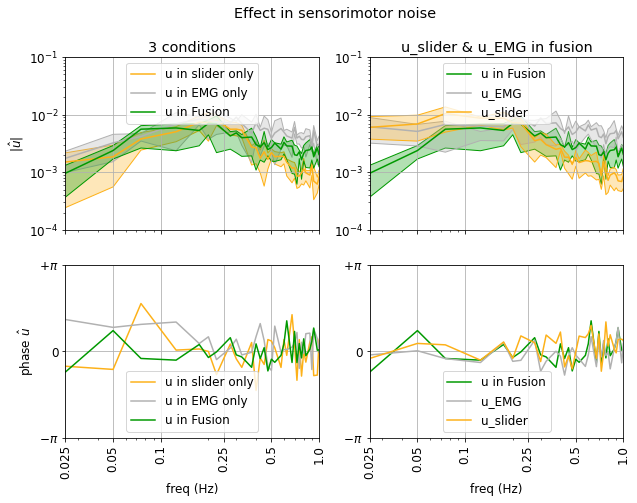

In [203]:
#plot U at non stimulated freq (Fig 9)
Plot_U_nonstim(U_nonstim)